## CREDIT PROFILE ANALYSIS (Two-Wheeler Loans)

**Problem Statement**- In India, there is a growing demand for two-wheeler loans, reflecting people's aspirations to own scooters or motorcycles. However, banks face the challenge of ensuring responsible lending by identifying individuals with the capacity to repay these loans. The issue at hand is developing an effective system that enables banks to make informed decisions about loan approvals, distinguishing between applicants who are suitable candidates for loans and those who may pose a higher risk of non-repayment. The goal is to establish a reliable method for assessing the creditworthiness of individuals seeking two-wheeler loans, thus facilitating responsible and inclusive financial practices in the banking sector.

In [747]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import warnings
import statsmodels.stats.api as smsa
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold, cross_val_score

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [748]:
df= pd.read_csv("credit_caps.csv")

In [749]:
df

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,32,Female,32000,596,14,5,150000,39,No,Telangana,Hyderabad,90.593752,Self-Employed,72,Business Owner
1,41,Male,83000,477,446,3,93015,62,No,Kerala,Thiruvananthapuram,65.457810,Self-Employed,65,Shopkeeper
2,42,Male,107000,762,538,8,150000,114,Yes,Delhi,New Delhi,59.584610,Salaried,90,Civil Servant
3,63,Female,77000,412,422,2,150000,111,No,West Bengal,Kolkata,55.129330,Salaried,66,Teacher
4,57,Male,119000,849,180,9,90438,133,Yes,West Bengal,Kolkata,54.397947,Self-Employed,100,Business Owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,59,Female,54000,341,410,0,135546,114,No,Uttar Pradesh,Lucknow,79.488573,Student,29,Student
99996,54,Male,121000,515,384,3,150000,46,No,Karnataka,Mysuru,77.990473,Salaried,88,Banker
99997,68,Other,95000,415,189,2,150000,38,No,Rajasthan,Jaipur,55.373881,Self-Employed,56,Business Owner
99998,35,Female,55000,450,115,2,80302,112,No,Maharashtra,Nagpur,73.947395,Salaried,66,Teacher


# Data description

In [750]:
df.shape

(100000, 15)

In [751]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Gender                    100000 non-null  object 
 2   Income                    100000 non-null  int64  
 3   Credit Score              100000 non-null  int64  
 4   Credit History Length     100000 non-null  int64  
 5   Number of Existing Loans  100000 non-null  int64  
 6   Loan Amount               100000 non-null  int64  
 7   Loan Tenure               100000 non-null  int64  
 8   Existing Customer         100000 non-null  object 
 9   State                     100000 non-null  object 
 10  City                      100000 non-null  object 
 11  LTV Ratio                 100000 non-null  float64
 12  Employment Profile        100000 non-null  object 
 13  Profile Score             100000 non-null  in

In [752]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,44.009320,15.308881,18.0,31.000000,44.000000,57.000000,70.0
Income,100000.0,76418.720000,42797.580888,9000.0,42000.000000,68000.000000,104000.000000,209000.0
Credit Score,100000.0,583.297900,162.993038,300.0,447.000000,584.000000,722.000000,850.0
Credit History Length,100000.0,308.013440,175.170732,6.0,156.000000,307.000000,460.000000,611.0
Number of Existing Loans,100000.0,4.707420,2.979001,0.0,2.000000,5.000000,7.000000,10.0
Loan Amount,100000.0,105629.901180,40543.807388,5294.0,71932.000000,111025.000000,150000.000000,150000.0
Loan Tenure,100000.0,133.236790,95.811364,12.0,62.000000,100.000000,200.000000,359.0
LTV Ratio,100000.0,71.686557,16.867019,40.0,58.119824,72.172826,86.333184,95.0
Profile Score,100000.0,77.316080,24.506826,0.0,61.000000,89.000000,98.000000,100.0


In [753]:
df.columns

Index(['Age', 'Gender', 'Income', 'Credit Score', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure',
       'Existing Customer', 'State', 'City', 'LTV Ratio', 'Employment Profile',
       'Profile Score', 'Occupation'],
      dtype='object')

# Checking Missing Values

In [605]:
(df.isnull().sum()/df.shape[0])*100

Age                         0.000
Gender                      0.000
Income                      0.000
Credit Score                0.000
Credit History Length       0.000
Number of Existing Loans    0.000
Loan Amount                 0.000
Loan Tenure                 0.000
Existing Customer           0.000
State                       0.000
City                        0.000
LTV Ratio                   0.000
Employment Profile          0.000
Profile Score               0.000
Occupation                  6.511
dtype: float64

In [606]:
# Under Occupation column, 6% of the data is missing

In [607]:
# Tried to find the pattern so that we can impute the missing values in the occupation columns
# There seems to be a relationship between Occupation and Employment Profile

In [608]:
# Checked where occupation is null, what is the Employmnet Profile there
df.loc[df['Occupation'].isnull(),'Employment Profile'].value_counts()

Unemployed    6511
Name: Employment Profile, dtype: int64

In [609]:
# Checked the value counts of Occupation where Employment Profile is unemployed so that we can 
# find the pattern, but there's no such pattern found as where the Employment Profile is 
# unemployed all the rows in the occupation column is null

df.loc[df['Employment Profile']=='Unemployed',].value_counts()

Series([], dtype: int64)

# Inference-
* Didn't find any pattern to impute occupation column null values, therefore, imputing the null values with **OTHERS**

In [610]:
df.loc[df['Occupation'].isnull(),'Occupation']='Others'

In [611]:
df.isnull().sum()

Age                         0
Gender                      0
Income                      0
Credit Score                0
Credit History Length       0
Number of Existing Loans    0
Loan Amount                 0
Loan Tenure                 0
Existing Customer           0
State                       0
City                        0
LTV Ratio                   0
Employment Profile          0
Profile Score               0
Occupation                  0
dtype: int64

In [612]:
df.Occupation.value_counts()

Teacher                   9890
Banker                    9859
Software Engineer         9733
Civil Servant             9680
Doctor                    9465
Shopkeeper                7614
Contractor                7570
Business Owner            7528
Farmer                    7414
Student                   6618
Others                    6511
Graphic Designer          2065
Photographer              2021
Independent Consultant    2017
Writer                    2015
Name: Occupation, dtype: int64

In [613]:
df.select_dtypes(include=np.number).columns

Index(['Age', 'Income', 'Credit Score', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure', 'LTV Ratio',
       'Profile Score'],
      dtype='object')

In [614]:
num_cols= ['Age', 'Income', 'Credit Score', 'Credit History Length', 'Loan Amount', 'Loan Tenure', 'LTV Ratio','Profile Score']

In [615]:
cat_cols= (set(df.columns)-set(num_cols))

In [616]:
cat_cols= ['City',
 'Employment Profile',
 'Existing Customer',
 'Gender',
 'Number of Existing Loans',
 'Occupation',
 'State']

In [617]:
print(len(num_cols))
print(len(cat_cols))

8
7


# Data Visualization

# Univariate 

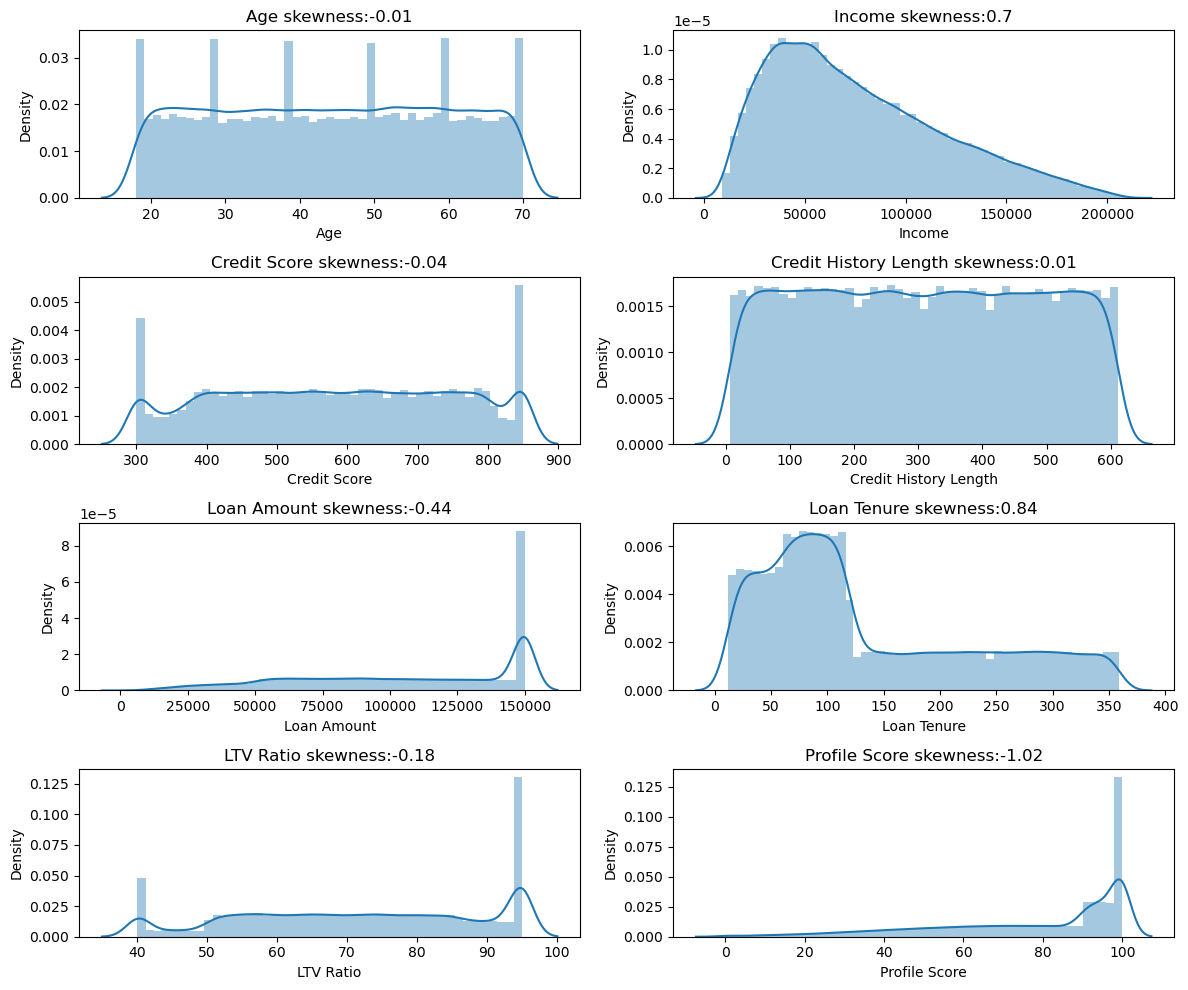

In [618]:
t=1
plt.figure(figsize=(12,10))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.distplot(df[i])
    plt.title(f'{i} skewness:{round(df[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

## Inference-
* **Age-** Age column is approximately uniformally distributed
* **Income-** Income column is Rightly Skewed
* **Credit Score-** Uniformally distributed
* **Credit History Length-** Uniformally distributed
* **Loan Amount-** Left skewed
* **Loan Tenure-** Right skewed
* **LTV Ratio-** Left Skewed
* **Profile Score-** Left skewed

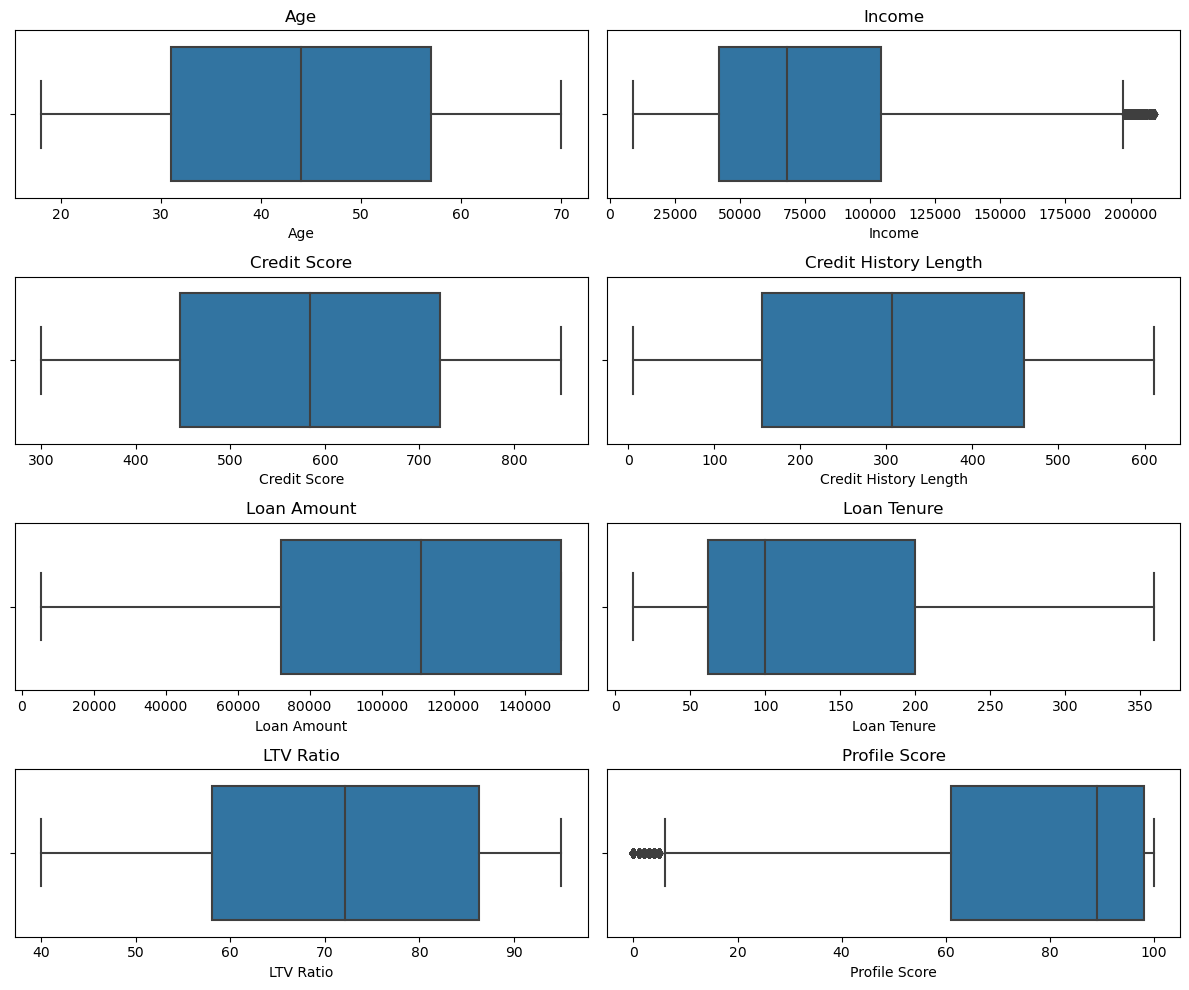

In [620]:
t=1
plt.figure(figsize=(12,10))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(df[i])
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

# Inference-

* **Age-** Median is around 44
* **Income-** Median is around 70k
* **Credit Score-** Median is 590
* **Credit History Length-** Median is around 302
* **Loan Amount-** Median is around 1,10,000
* **Loan Tenure-** Median is 100
* **LTV Ratio-** Median is 75
* **Profile Score-** Median is 90



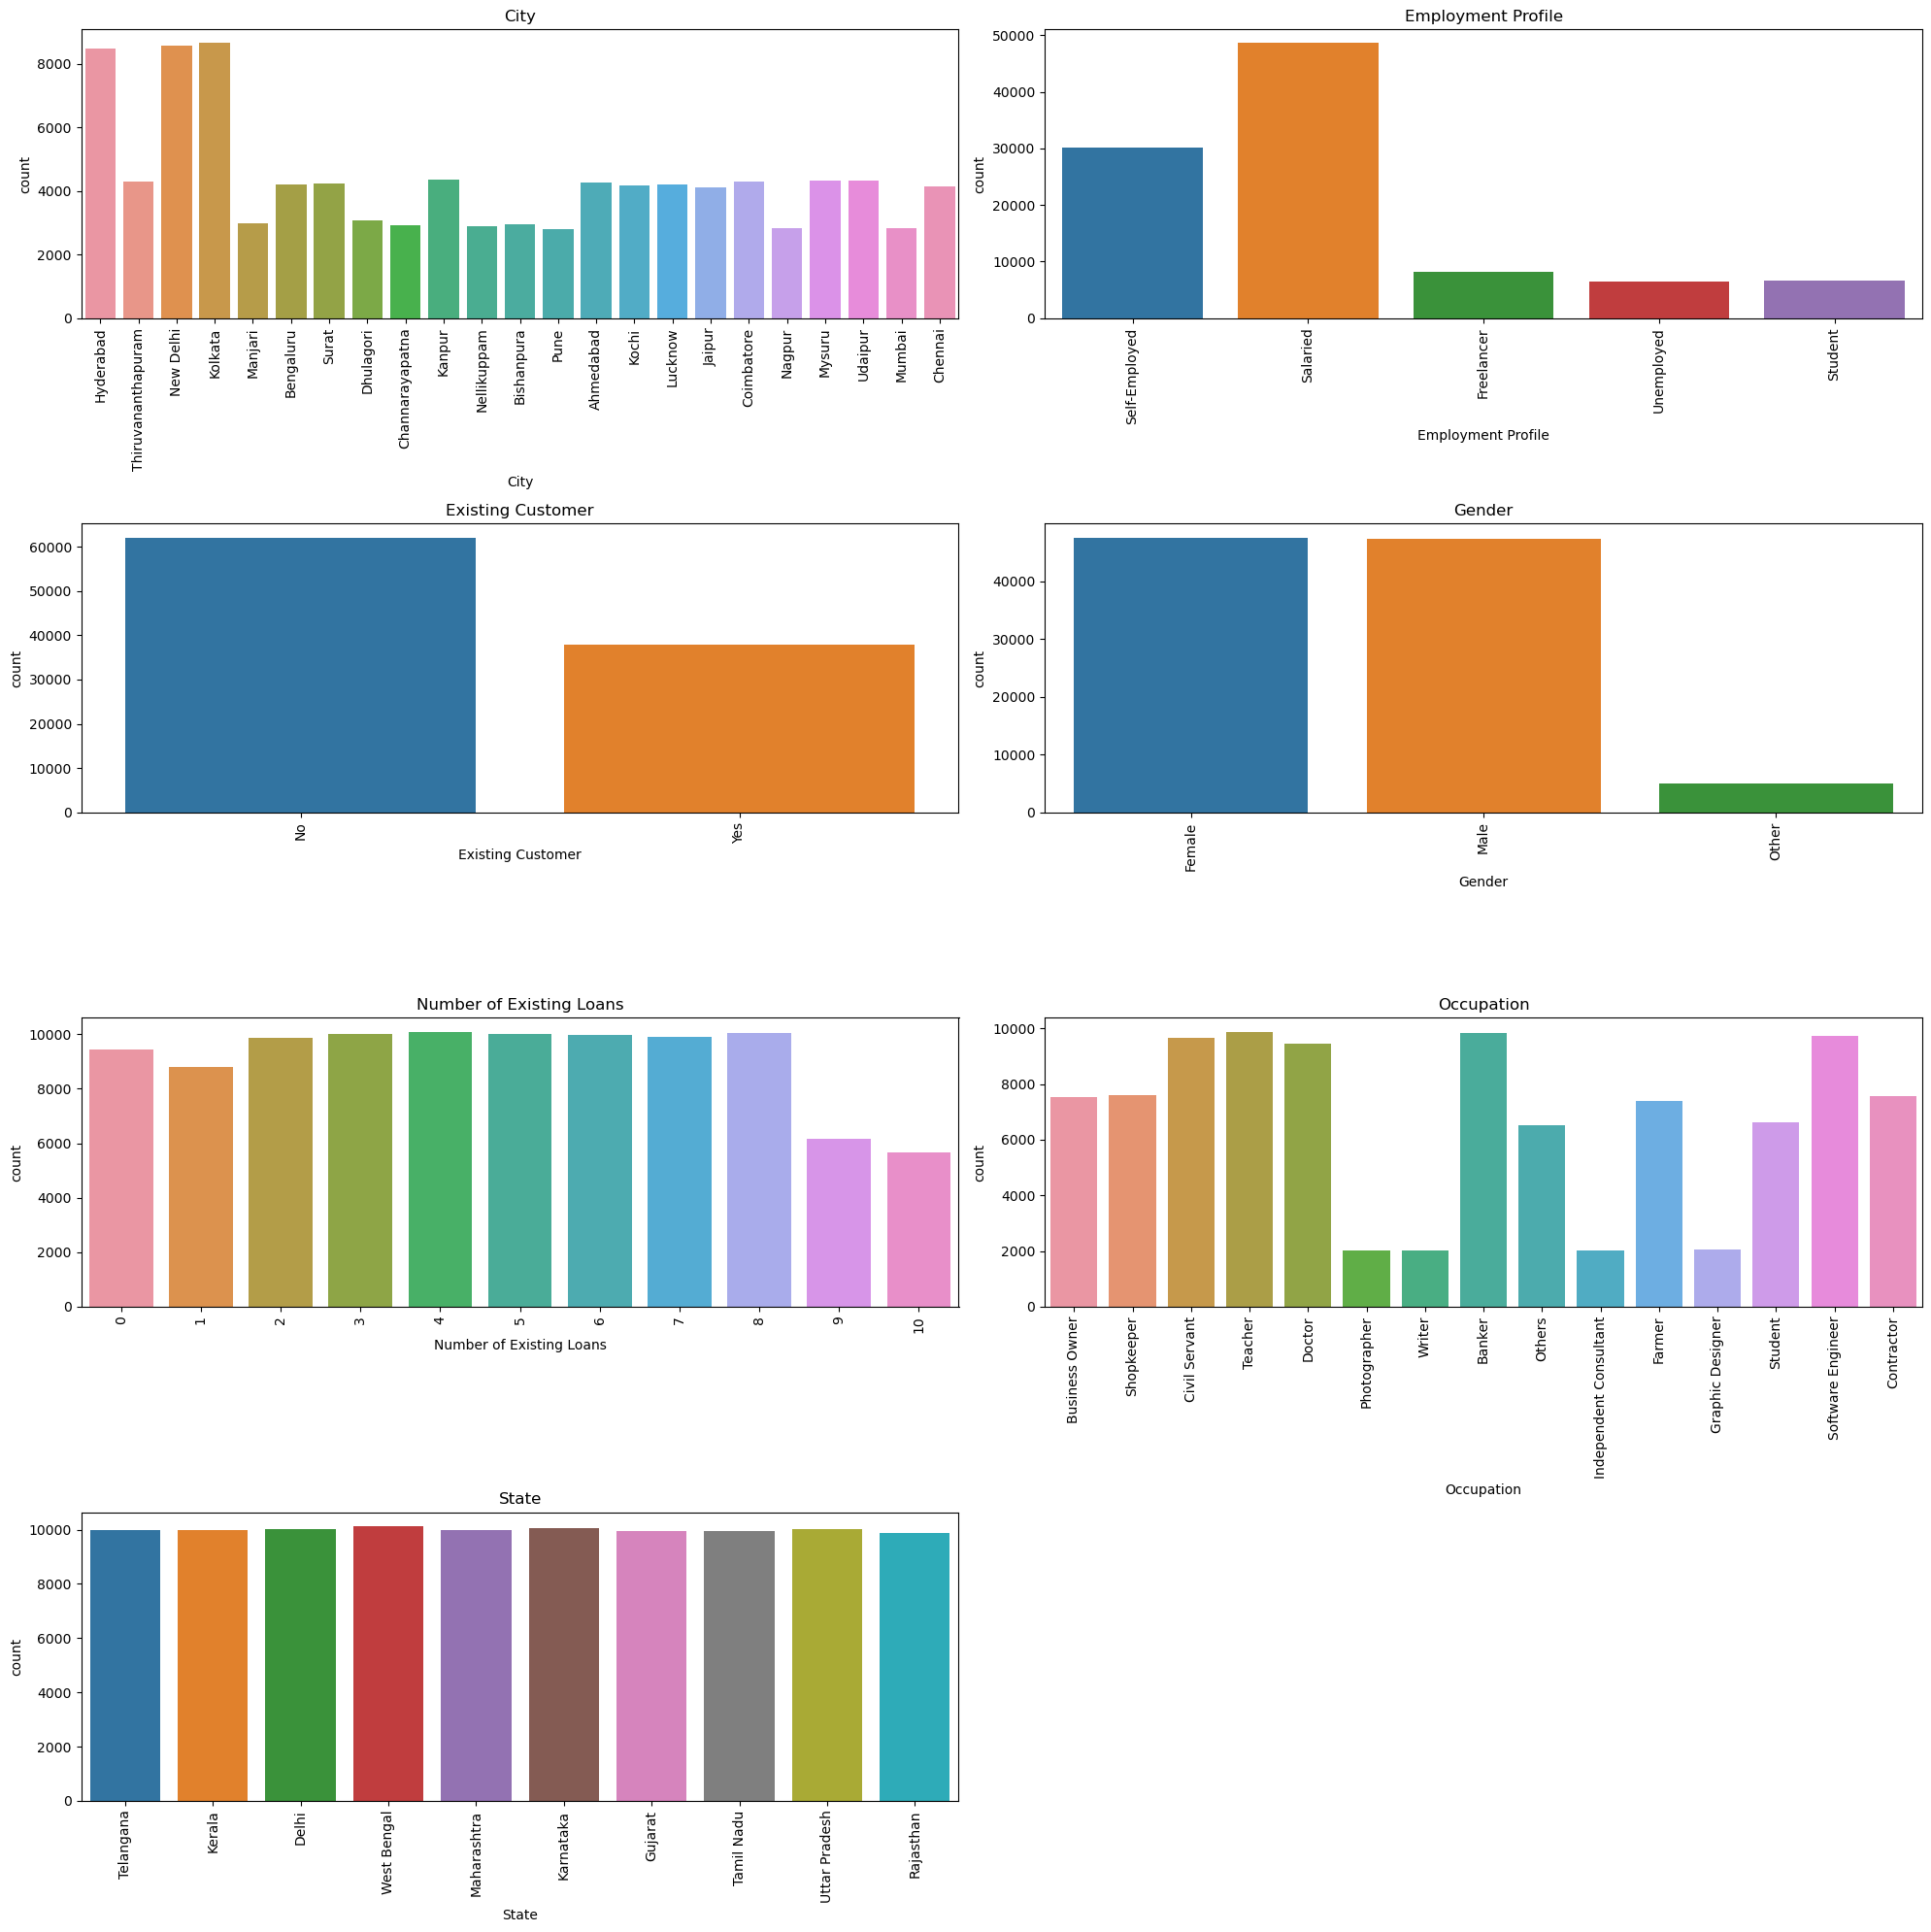

In [621]:
t=1
plt.figure(figsize=(20,20))
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.countplot(data=df,x=df[i])
    plt.xticks(rotation=90)
    plt.title(i)
    t+=1
plt.tight_layout()
plt.show()

# Inference-

* **City-** Hyderabad, New Delhi and kolkata has highest count
* **Eployment Profile-** Salaried>Self employed> Freelancer>umemplyed and Student
* **Existing Customer-** No has the highest count
* **Gender-** Male and Female has almost similar count and more than others
* **Number of Existimg Loans-** 9 & 10 has lowest count
* **Occupation-** civil service,Teacher,Doctor, banker and software engineer has highest count
* **State-** all states have similar counts

# Bivariate 

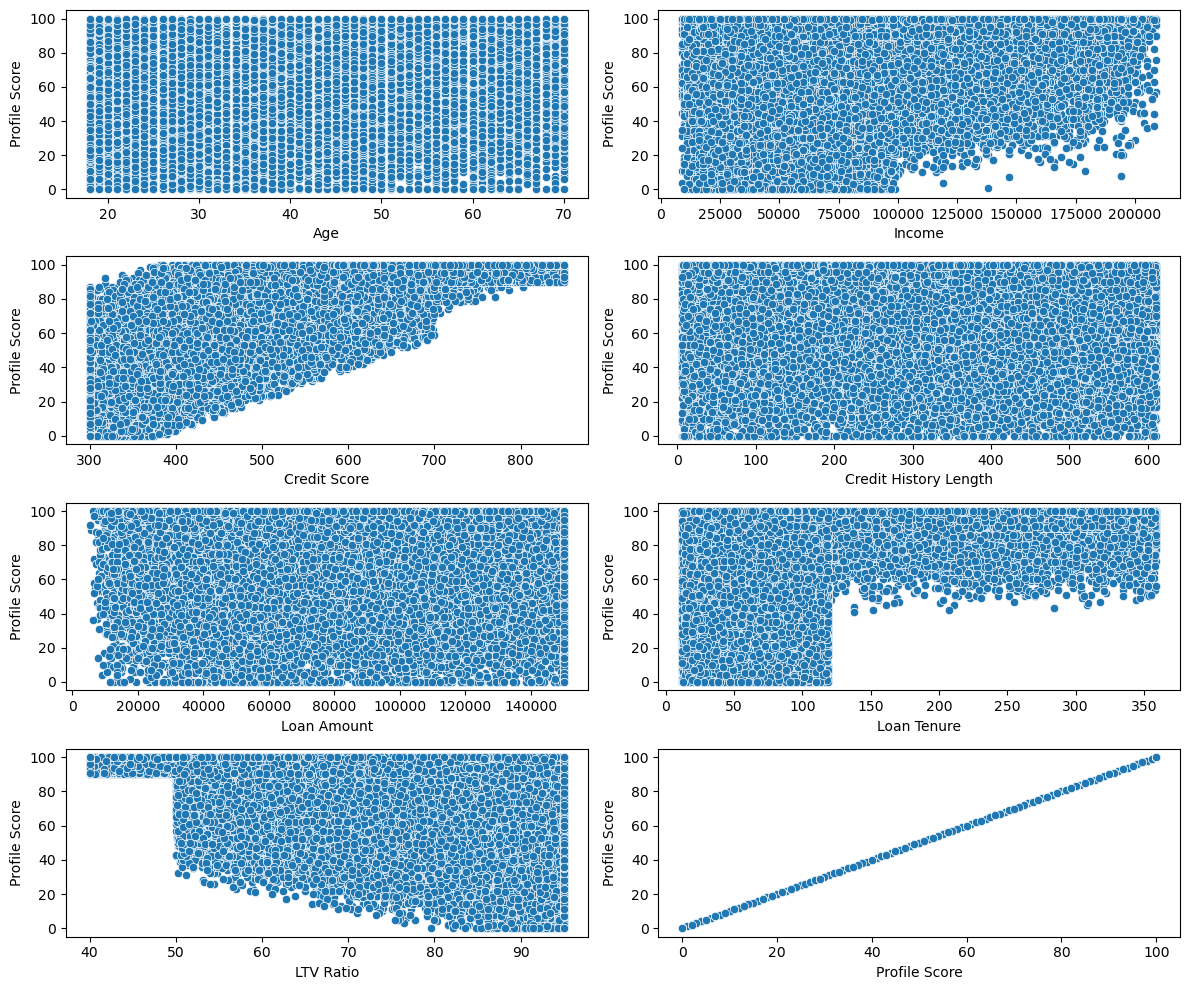

In [622]:
# Num vs num
t=1
plt.figure(figsize=(12,10))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.scatterplot(data=df,x=df.loc[:,i],y=df['Profile Score'])
    t+=1
plt.tight_layout()
plt.show()

## Inference

* As all the data points are uniformly distributed. Therefore, there is no such significant relation between Number and targert column.

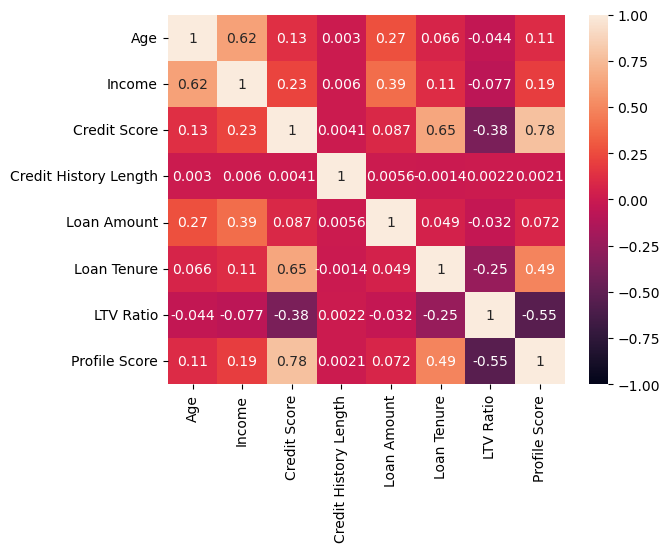

In [623]:
sns.heatmap(df[num_cols].corr(),annot=True,vmin=-1,vmax=1)
plt.show()

# Inference

* Income and age are  +ve correlated (62%)
* Loan Tenure and Credit score are +ve correlated (65%)
* Profile score and Credit score are +ve correlated (78%)
* profile score and LTV ratio are -ve correlated (55%)


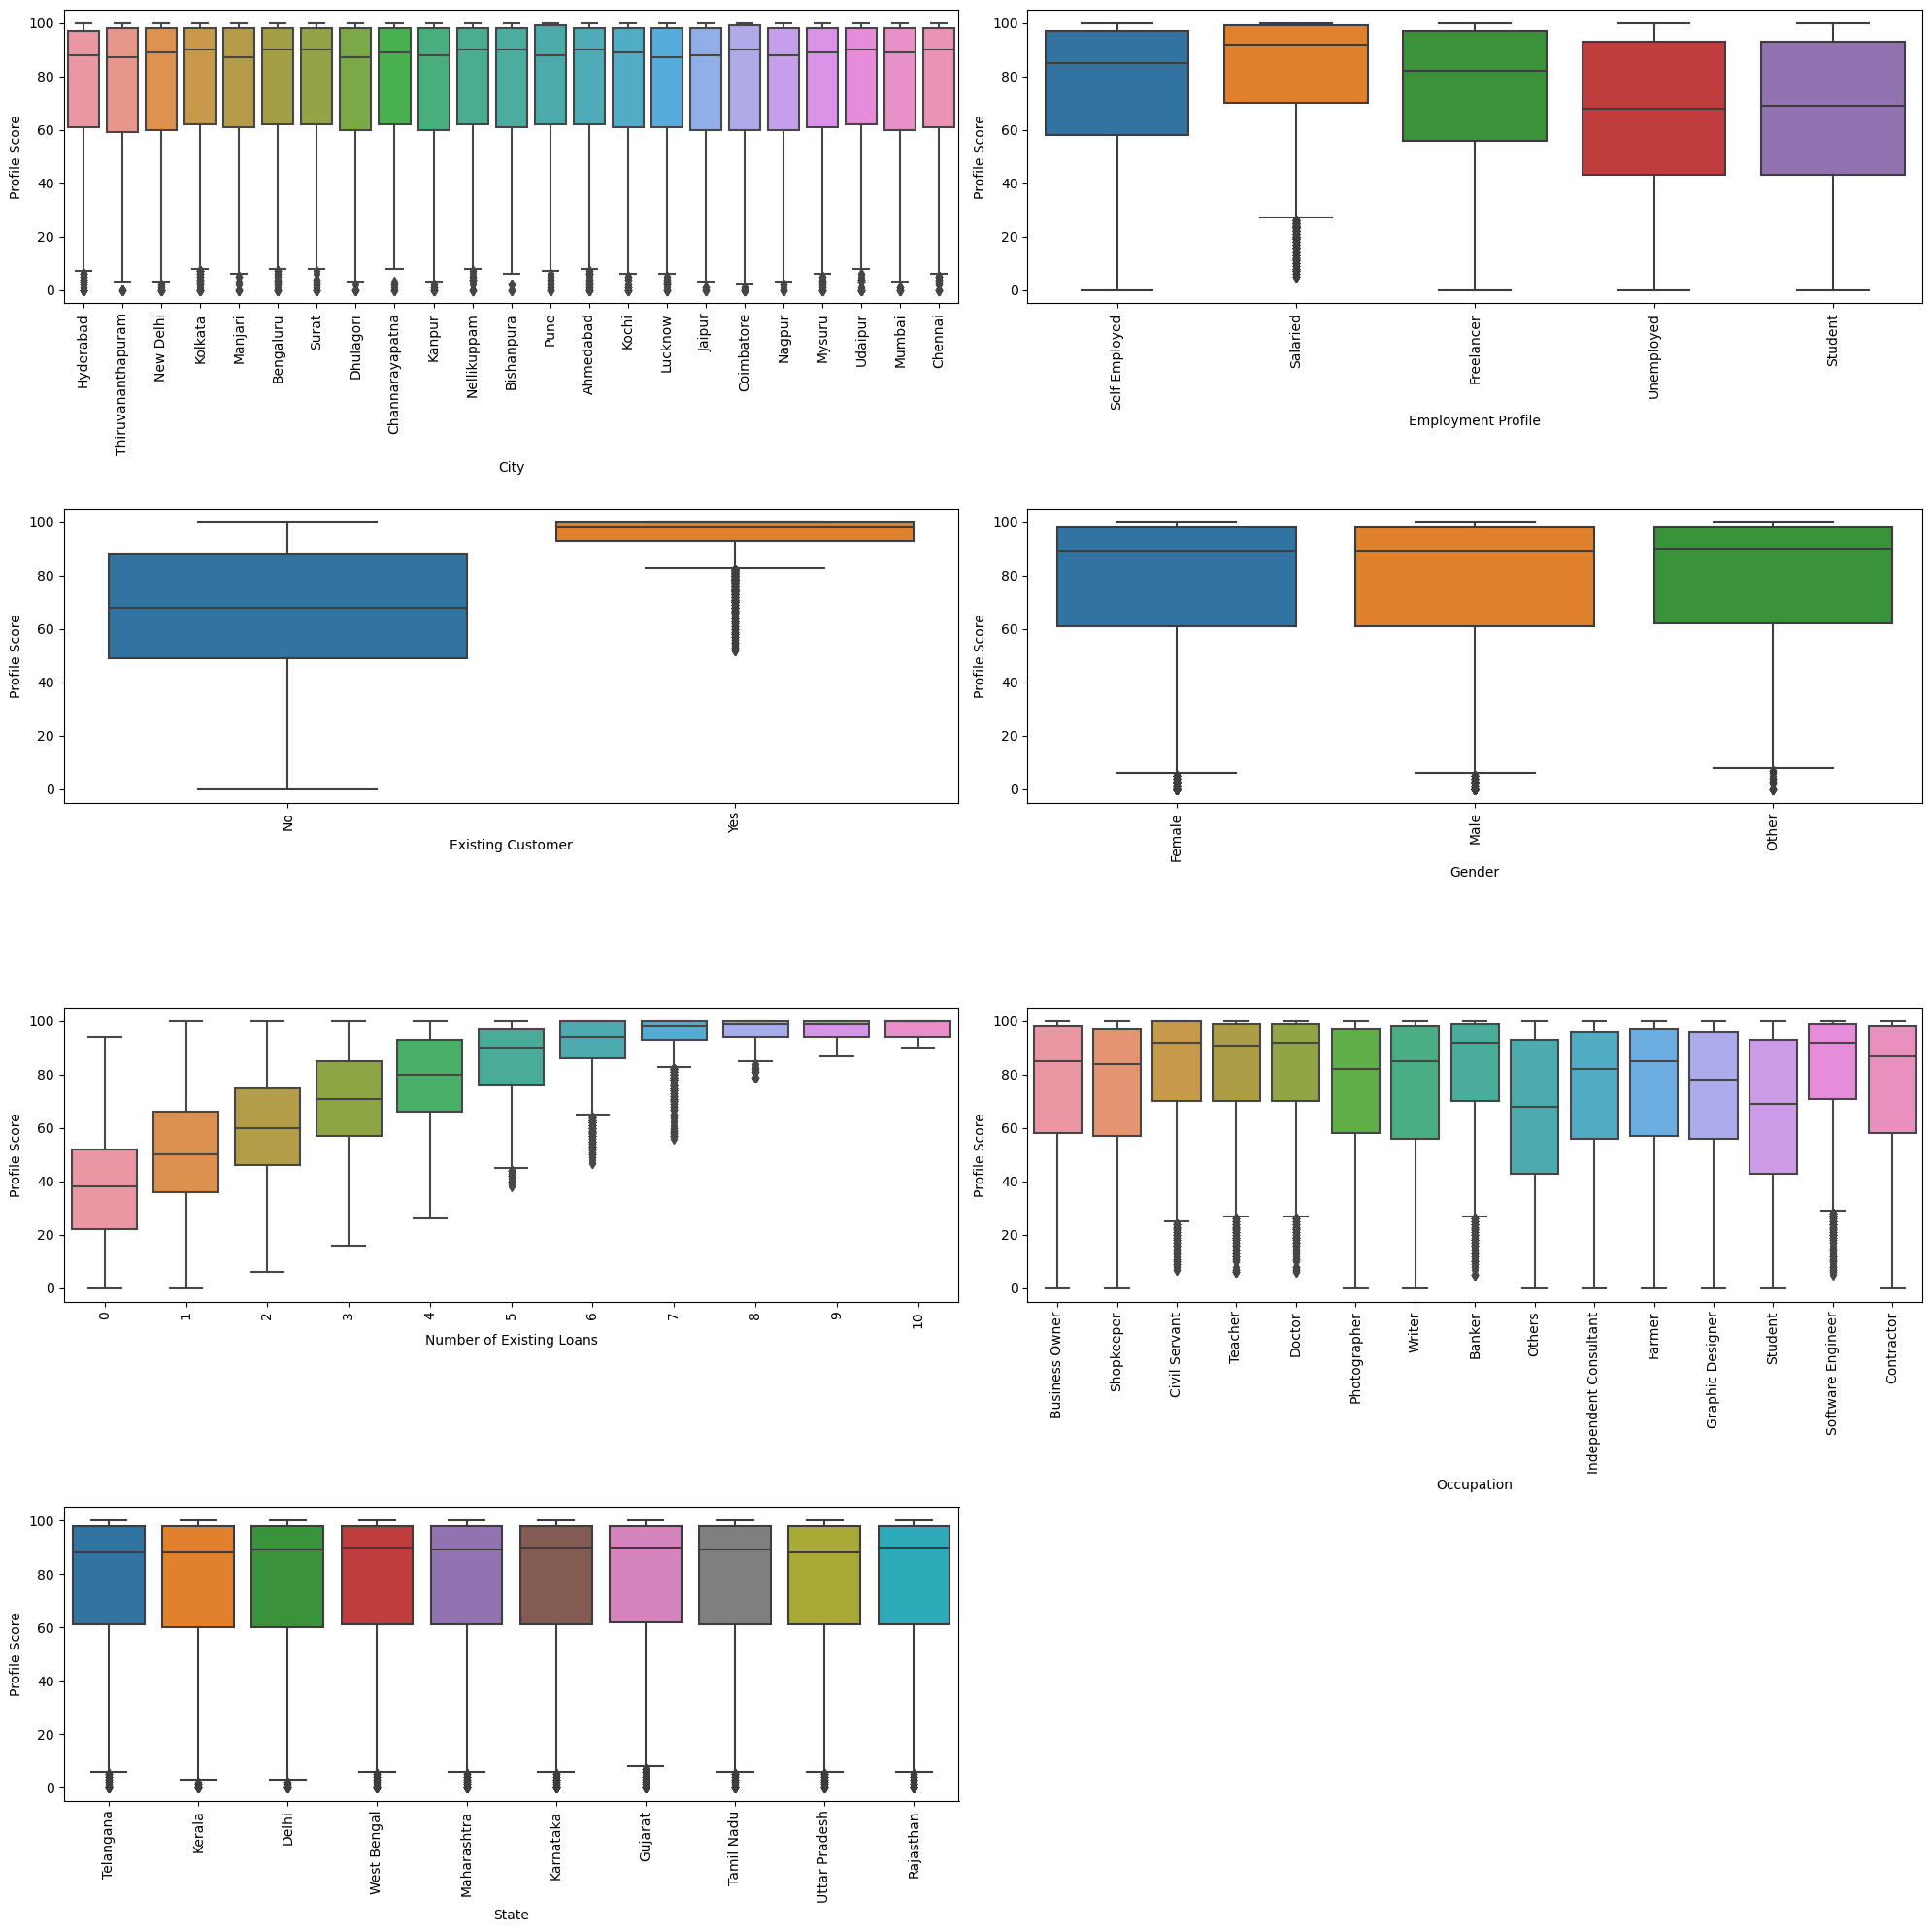

In [624]:
# cat vs num
t=1
plt.figure(figsize=(20,20))
for i in cat_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data=df,x=df.loc[:,i],y=df['Profile Score'])
    plt.xticks(rotation=90)
    t+=1
plt.tight_layout()
plt.show()

# Inference

* **City-** Profile scores of all cities is approximately same
* **Employment Profile-** Profile Score of the salaried employee is the highest
* **Existing Customer-** Profile score of the existing cutomer is higher
* **Gender-** Profile Score of all the genders is same
* **No of Existing Loans-** People whose exting loans are 9 and 10 has the highest Profile Score
* **Occupation-** Occupation with Others and Students has the lowest Profile Score
* **State-** All the States have similar Profile Scores

## Exploring the Data

In [625]:
df['Employment Profile'].value_counts()

Salaried         48627
Self-Employed    30126
Freelancer        8118
Student           6618
Unemployed        6511
Name: Employment Profile, dtype: int64

In [626]:
df['Occupation'].value_counts()

Teacher                   9890
Banker                    9859
Software Engineer         9733
Civil Servant             9680
Doctor                    9465
Shopkeeper                7614
Contractor                7570
Business Owner            7528
Farmer                    7414
Student                   6618
Others                    6511
Graphic Designer          2065
Photographer              2021
Independent Consultant    2017
Writer                    2015
Name: Occupation, dtype: int64

In [627]:
df.groupby(['State','City'])['State'].value_counts()

State          City                State        
Delhi          Bishanpura          Delhi             305
               Channarayapatna     Delhi             269
               Dhulagori           Delhi             306
               Manjari             Delhi             296
               Nellikuppam         Delhi             277
               New Delhi           Delhi            8576
Gujarat        Ahmedabad           Gujarat          4260
               Bishanpura          Gujarat           318
               Channarayapatna     Gujarat           299
               Dhulagori           Gujarat           310
               Manjari             Gujarat           255
               Nellikuppam         Gujarat           280
               Surat               Gujarat          4229
Karnataka      Bengaluru           Karnataka        4206
               Bishanpura          Karnataka         291
               Channarayapatna     Karnataka         293
               Dhulagori           Karn

## Inference

* During data exploration, it was observed that certain cities are listed in multiple states. Further investigation and handling are required to maintain data integrity.

* Cleaning process - Putting the correct cities in their respective states.

# Data Cleaning

In [628]:
# Nellikuppam- Tamil Nadu
# Manjari- Maharashtra
# Dhulagarh- West Bengal
# Channarayapatna- Karnataka
# Bishanpura- Punjab

In [629]:
df.loc[df['City']=='Nellikuppam','State']='Tamil Nadu'
df.loc[df['City']=='Manjari','State']='Maharashtra'
df.loc[df['City']=='Dhulagori','State']='West Bengal'
df.loc[df['City']=='Channarayapatna','State']='Karnataka'
df.loc[df['City']=='Bishanpura','State']='Punjab'

In [630]:
df.groupby(['State','City'])['State'].value_counts()

State          City                State        
Delhi          New Delhi           Delhi            8576
Gujarat        Ahmedabad           Gujarat          4260
               Surat               Gujarat          4229
Karnataka      Bengaluru           Karnataka        4206
               Channarayapatna     Karnataka        2937
               Mysuru              Karnataka        4335
Kerala         Kochi               Kerala           4162
               Thiruvananthapuram  Kerala           4295
Maharashtra    Manjari             Maharashtra      2982
               Mumbai              Maharashtra      2844
               Nagpur              Maharashtra      2823
               Pune                Maharashtra      2805
Punjab         Bishanpura          Punjab           2962
Rajasthan      Jaipur              Rajasthan        4107
               Udaipur             Rajasthan        4327
Tamil Nadu     Chennai             Tamil Nadu       4161
               Coimbatore          Tami

In [631]:
df.State.value_counts()

West Bengal      11742
Karnataka        11478
Maharashtra      11454
Tamil Nadu       11354
Delhi             8576
Uttar Pradesh     8569
Gujarat           8489
Telangana         8485
Kerala            8457
Rajasthan         8434
Punjab            2962
Name: State, dtype: int64

## Feature Engineering

### Binning the State column into Zone

In [632]:
east=['West Bengal']
west=['Maharashtra','Gujarat']
north=['Delhi','Uttar Pradesh','Rajasthan','Punjab']
south=['Karnataka','Tamil Nadu','Telangana','Kerala']

In [633]:
def zone(region):
    if region in south:
        return('South')
    elif region in north:
        return('North')
    elif region in west:
        return('West')
    else:
        return('East')

In [634]:
df['State']= df['State'].apply(zone)

In [635]:
df.State.value_counts()

South    39774
North    28541
West     19943
East     11742
Name: State, dtype: int64

In [636]:
df.rename(columns={'State':'Zone'},inplace=True)

In [637]:
df.head(2)

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,Zone,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,32,Female,32000,596,14,5,150000,39,No,South,Hyderabad,90.593752,Self-Employed,72,Business Owner
1,41,Male,83000,477,446,3,93015,62,No,South,Thiruvananthapuram,65.457810,Self-Employed,65,Shopkeeper


<AxesSubplot:xlabel='Zone', ylabel='Profile Score'>

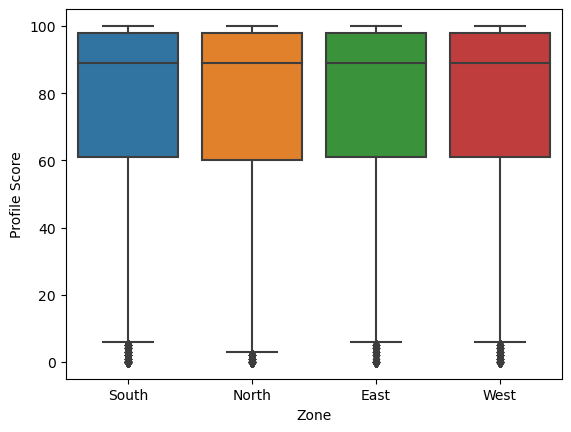

In [638]:
sns.boxplot(x=df['Zone'],y=df['Profile Score'])

* The Profile Score for all the zone is approximately same

In [639]:
df.groupby(['Employment Profile','Occupation'])['Employment Profile'].count()

Employment Profile  Occupation            
Freelancer          Graphic Designer          2065
                    Independent Consultant    2017
                    Photographer              2021
                    Writer                    2015
Salaried            Banker                    9859
                    Civil Servant             9680
                    Doctor                    9465
                    Software Engineer         9733
                    Teacher                   9890
Self-Employed       Business Owner            7528
                    Contractor                7570
                    Farmer                    7414
                    Shopkeeper                7614
Student             Student                   6618
Unemployed          Others                    6511
Name: Employment Profile, dtype: int64

In [640]:
df['Employment Profile'].value_counts()

Salaried         48627
Self-Employed    30126
Freelancer        8118
Student           6618
Unemployed        6511
Name: Employment Profile, dtype: int64

### A new column is created EMI per month with the help of the columns-Loan Amount and Loan Tenure

In [641]:
df["EMI_per_Month"]=df["Loan Amount"]/df["Loan Tenure"]

In [642]:
df["EMI_per_Month"]

0        3846.153846
1        1500.241935
2        1315.789474
3        1351.351351
4         679.984962
            ...     
99995    1189.000000
99996    3260.869565
99997    3947.368421
99998     716.982143
99999    1562.500000
Name: EMI_per_Month, Length: 100000, dtype: float64

<AxesSubplot:xlabel='EMI_per_Month', ylabel='Profile Score'>

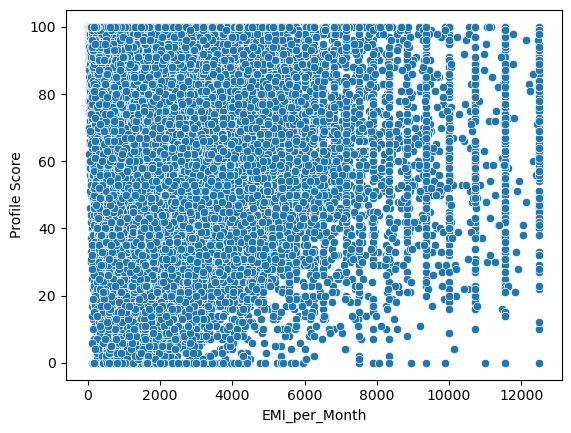

In [643]:
sns.scatterplot(x= df['EMI_per_Month'],y=df['Profile Score'])

* All the data points are randomly scattered

## Statistical Testing:

In [644]:
num_cols,cat_cols

(['Age',
  'Income',
  'Credit Score',
  'Credit History Length',
  'Loan Amount',
  'Loan Tenure',
  'LTV Ratio',
  'Profile Score'],
 ['City',
  'Employment Profile',
  'Existing Customer',
  'Gender',
  'Number of Existing Loans',
  'Occupation',
  'State'])

### Data- Assumptions of Hypothesis Testing

* **Normality Test:** The data should be normal. Here we apply `` Shapiro Wilk Test of normality`` to check if the data is normal

* **Ho: Data is normal**
* **Ha: Data is not normal**


* **Equality of Variance:** The variance of the numerical columns has to be equal.
  The Statistical Test involved  is called ``Levene's Test of Variance ``.

* **Ho: Equality of Variance Condition is Met.**
* **Ha: Equality of variance condition is not Met**

In [645]:
for i in num_cols:
    if i != "Profile Score":
        print(i,"=",stats.shapiro(df[i]))
        print(i,"=",stats.levene(df[i],df["Profile Score"]),"\n")

Age = ShapiroResult(statistic=0.95396488904953, pvalue=0.0)
Age = LeveneResult(statistic=9045.927850284483, pvalue=0.0) 

Income = ShapiroResult(statistic=0.9469860196113586, pvalue=0.0)
Income = LeveneResult(statistic=168218.10620773994, pvalue=0.0) 

Credit Score = ShapiroResult(statistic=0.9587904214859009, pvalue=0.0)
Credit Score = LeveneResult(statistic=199643.09856935963, pvalue=0.0) 

Credit History Length = ShapiroResult(statistic=0.9544581174850464, pvalue=0.0)
Credit History Length = LeveneResult(statistic=219707.3364260872, pvalue=0.0) 

Loan Amount = ShapiroResult(statistic=0.8964158892631531, pvalue=0.0)
Loan Amount = LeveneResult(statistic=294787.9083288887, pvalue=0.0) 

Loan Tenure = ShapiroResult(statistic=0.8887526988983154, pvalue=0.0)
Loan Tenure = LeveneResult(statistic=58118.47616536748, pvalue=0.0) 

LTV Ratio = ShapiroResult(statistic=0.9431557059288025, pvalue=0.0)
LTV Ratio = LeveneResult(statistic=5650.537633332108, pvalue=0.0) 



### Inference:
* P-value of shapiro and levene is less than 0.05(Significant level),meaning that the data is not normal and it does not has equal variance.


**Since the assumptions are not met, we should proceed with non-parametric test of the T-test which is Mann-Whitneyu test.**

### Hypothesis of Mann- Whitneyu

* Ho: There is no relation between Number & Target.
* Ha: There is relation between Number & Target.

In [646]:
for i in num_cols:
    if i != "Profile Score":
        print(i,"=",stats.mannwhitneyu(df[i],df["Profile Score"]))

Age = MannwhitneyuResult(statistic=1441694135.0, pvalue=0.0)
Income = MannwhitneyuResult(statistic=10000000000.0, pvalue=0.0)
Credit Score = MannwhitneyuResult(statistic=10000000000.0, pvalue=0.0)
Credit History Length = MannwhitneyuResult(statistic=8811514252.5, pvalue=0.0)
Loan Amount = MannwhitneyuResult(statistic=10000000000.0, pvalue=0.0)
Loan Tenure = MannwhitneyuResult(statistic=6422256504.5, pvalue=0.0)
LTV Ratio = MannwhitneyuResult(statistic=3693898437.0, pvalue=0.0)


### Inference

* There is a relation betweeen Number and Target Column, since it's Pvalue is less than 0.05 therefore, they all are statistically significant columns.

In [647]:
for i in ['City','Employment Profile','Existing Customer','Gender','Number of Existing Loans',
'Occupation','Zone']:
    for j in df.loc[:,i].unique():
        print(i,":",j,"=",stats.shapiro(df.loc[df[i]==j,["Profile Score"]]))
    print('\n')

City : Hyderabad = ShapiroResult(statistic=0.8560394048690796, pvalue=0.0)
City : Thiruvananthapuram = ShapiroResult(statistic=0.8587915897369385, pvalue=0.0)
City : New Delhi = ShapiroResult(statistic=0.8531140089035034, pvalue=0.0)
City : Kolkata = ShapiroResult(statistic=0.848434567451477, pvalue=0.0)
City : Manjari = ShapiroResult(statistic=0.8576815128326416, pvalue=1.401298464324817e-45)
City : Bengaluru = ShapiroResult(statistic=0.8422804474830627, pvalue=0.0)
City : Surat = ShapiroResult(statistic=0.8423674702644348, pvalue=0.0)
City : Dhulagori = ShapiroResult(statistic=0.8565868139266968, pvalue=0.0)
City : Channarayapatna = ShapiroResult(statistic=0.8504238128662109, pvalue=0.0)
City : Kanpur = ShapiroResult(statistic=0.8555750846862793, pvalue=0.0)
City : Nellikuppam = ShapiroResult(statistic=0.8441269993782043, pvalue=0.0)
City : Bishanpura = ShapiroResult(statistic=0.8448320627212524, pvalue=0.0)
City : Pune = ShapiroResult(statistic=0.8498138189315796, pvalue=1.401298464

### Inference:
* P-value of shapiro normality test is less than 0.05(Significant level),meaning that the data is not normal.

* Since the assumptions are not met, we should proceed with non-parametric test of ANOVA Test, which is Kruskal Wallis test.

### Hypothesis of Kruskal Wallis

* Ho: There is no relation between Categories & Target.
* Ha: There is relation between Categories & Target.

In [648]:
d={}
for i in df.Zone.unique():
    a=df.loc[df.Zone==i,"Profile Score"]
    d[i]=a

In [649]:
stats.kruskal(d["South"],d["North"],d["East"],d["West"])

KruskalResult(statistic=2.3429894834793172, pvalue=0.504335324790673)

In [650]:
d={}
for i in df.Occupation.unique():
    a=df.loc[df.Occupation==i,"Profile Score"]
    d[i]=a

In [651]:
stats.kruskal(d["Business Owner"],d["Shopkeeper"],d["Civil Servant"],d["Teacher"],d["Doctor"],
             d["Photographer"],d["Writer"],d["Banker"],d["Others"],d["Independent Consultant"],
             d["Farmer"],d["Graphic Designer"],d["Software Engineer"],d["Contractor"],d["Student"])

KruskalResult(statistic=4374.2863001627065, pvalue=0.0)

In [652]:
d={}
for i in df["Number of Existing Loans"].unique():
    a=df.loc[df["Number of Existing Loans"]==i,"Profile Score"]
    d[i]=a

In [653]:
stats.kruskal(d[0],d[1],d[2],d[3],d[4],d[5],d[6],d[7],d[8],d[9],d[10])

KruskalResult(statistic=63041.67587611355, pvalue=0.0)

In [654]:
d={}
for i in df.Gender.unique():
    a=df.loc[df.Gender==i,"Profile Score"]
    d[i]=a

In [655]:
stats.kruskal(d["Female"],d["Male"],d["Other"])

KruskalResult(statistic=2.956258390959179, pvalue=0.22806395260444845)

In [656]:
d={}
for i in df["Existing Customer"].unique():
    a=df.loc[df["Existing Customer"]==i,"Profile Score"]
    d[i]=a

In [657]:
stats.kruskal(d["No"],d["Yes"])

KruskalResult(statistic=43227.12537870628, pvalue=0.0)

In [658]:
d={}
for i in df["Employment Profile"].unique():
    a=df.loc[df["Employment Profile"]==i,"Profile Score"]
    d[i]=a

In [659]:
d.keys()
stats.kruskal(d['Self-Employed'],d['Salaried'],d['Freelancer'],d['Unemployed'],d['Student'])

KruskalResult(statistic=4350.538505572023, pvalue=0.0)

## Inference
Except for Zone & Gender all Other categorical columns are statistically significant, since their Pvalue is less than 0.05.

In [660]:
# since under visulaization, we saw that state and genderhave almost same profile score for all the categories which are not telling any significant information w.r.t to target variable.
# Hence, deleting both the features from the data

In [661]:
df.columns

Index(['Age', 'Gender', 'Income', 'Credit Score', 'Credit History Length',
       'Number of Existing Loans', 'Loan Amount', 'Loan Tenure',
       'Existing Customer', 'Zone', 'City', 'LTV Ratio', 'Employment Profile',
       'Profile Score', 'Occupation', 'EMI_per_Month'],
      dtype='object')

In [662]:
df.drop(['Gender','Zone'],axis=1,inplace=True)

# Encoding the Categorical columns

* Age- Label Encoding
* City- Catboost Encoding
* Employmnet profile- Catboost Encoding
* Occupation- Catboost Encoding
* Existing Customer- Label Encoding (No-0, Yes-1)
* Gender- Label Encosing (Other-0, Male-1, Female-2)

In [663]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  int64  
 1   Income                    100000 non-null  int64  
 2   Credit Score              100000 non-null  int64  
 3   Credit History Length     100000 non-null  int64  
 4   Number of Existing Loans  100000 non-null  int64  
 5   Loan Amount               100000 non-null  int64  
 6   Loan Tenure               100000 non-null  int64  
 7   Existing Customer         100000 non-null  object 
 8   City                      100000 non-null  object 
 9   LTV Ratio                 100000 non-null  float64
 10  Employment Profile        100000 non-null  object 
 11  Profile Score             100000 non-null  int64  
 12  Occupation                100000 non-null  object 
 13  EMI_per_Month             100000 non-null  fl

In [664]:
df['Age']= df['Age'].astype('object')

In [665]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       100000 non-null  object 
 1   Income                    100000 non-null  int64  
 2   Credit Score              100000 non-null  int64  
 3   Credit History Length     100000 non-null  int64  
 4   Number of Existing Loans  100000 non-null  int64  
 5   Loan Amount               100000 non-null  int64  
 6   Loan Tenure               100000 non-null  int64  
 7   Existing Customer         100000 non-null  object 
 8   City                      100000 non-null  object 
 9   LTV Ratio                 100000 non-null  float64
 10  Employment Profile        100000 non-null  object 
 11  Profile Score             100000 non-null  int64  
 12  Occupation                100000 non-null  object 
 13  EMI_per_Month             100000 non-null  fl

In [666]:
from sklearn.preprocessing import LabelEncoder

In [667]:
def Age_group(x):
    if x<=18:
        return 'teenager'
    elif x>18 and x<=39:
        return 'adults'
    elif x>39 and x<=59:
        return 'middle-aged'
    else:
        return 'old-aged'

In [668]:
df['Age_Group']= df['Age'].apply(Age_group)

In [669]:
le= LabelEncoder()
df['Age_Group']= le.fit_transform(df['Age_Group'])

In [671]:
df.loc[(df['Age']>18) & (df['Age']<=39),['Age_Group']]

,Age_Group
0,0
5,0
7,0
8,0
11,0
...,...
99987,0
99988,0
99991,0
99994,0


<AxesSubplot:xlabel='Age_Group'>

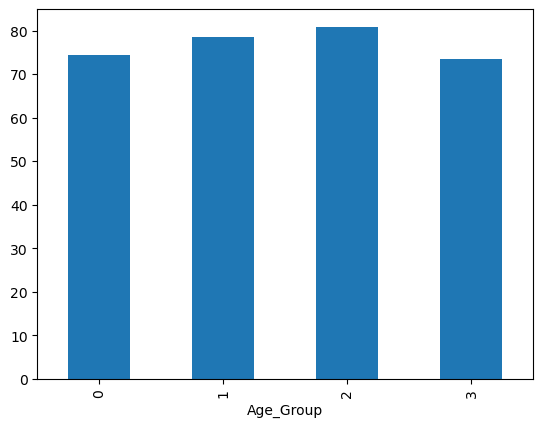

In [670]:
df.groupby(['Age_Group'])['Profile Score'].mean().plot(kind='bar')

In [672]:
df.drop(['Age'],axis=1,inplace=True)

In [673]:
df.head(2)

,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,City,LTV Ratio,Employment Profile,Profile Score,Occupation,EMI_per_Month,Age_Group
0,32000,596,14,5,150000,39,No,Hyderabad,90.593752,Self-Employed,72,Business Owner,3846.153846,0
1,83000,477,446,3,93015,62,No,Thiruvananthapuram,65.457810,Self-Employed,65,Shopkeeper,1500.241935,1


In [674]:
# Existing Customer- No-0, Yes-1

In [675]:
df['Existing Customer']= df['Existing Customer'].apply(lambda x: 0 if x in ['No'] else 1)

In [676]:
df.head()

,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,City,LTV Ratio,Employment Profile,Profile Score,Occupation,EMI_per_Month,Age_Group
0,32000,596,14,5,150000,39,0,Hyderabad,90.593752,Self-Employed,72,Business Owner,3846.153846,0
1,83000,477,446,3,93015,62,0,Thiruvananthapuram,65.457810,Self-Employed,65,Shopkeeper,1500.241935,1
2,107000,762,538,8,150000,114,1,New Delhi,59.584610,Salaried,90,Civil Servant,1315.789474,1
3,77000,412,422,2,150000,111,0,Kolkata,55.129330,Salaried,66,Teacher,1351.351351,2
4,119000,849,180,9,90438,133,1,Kolkata,54.397947,Self-Employed,100,Business Owner,679.984962,1


<AxesSubplot:>

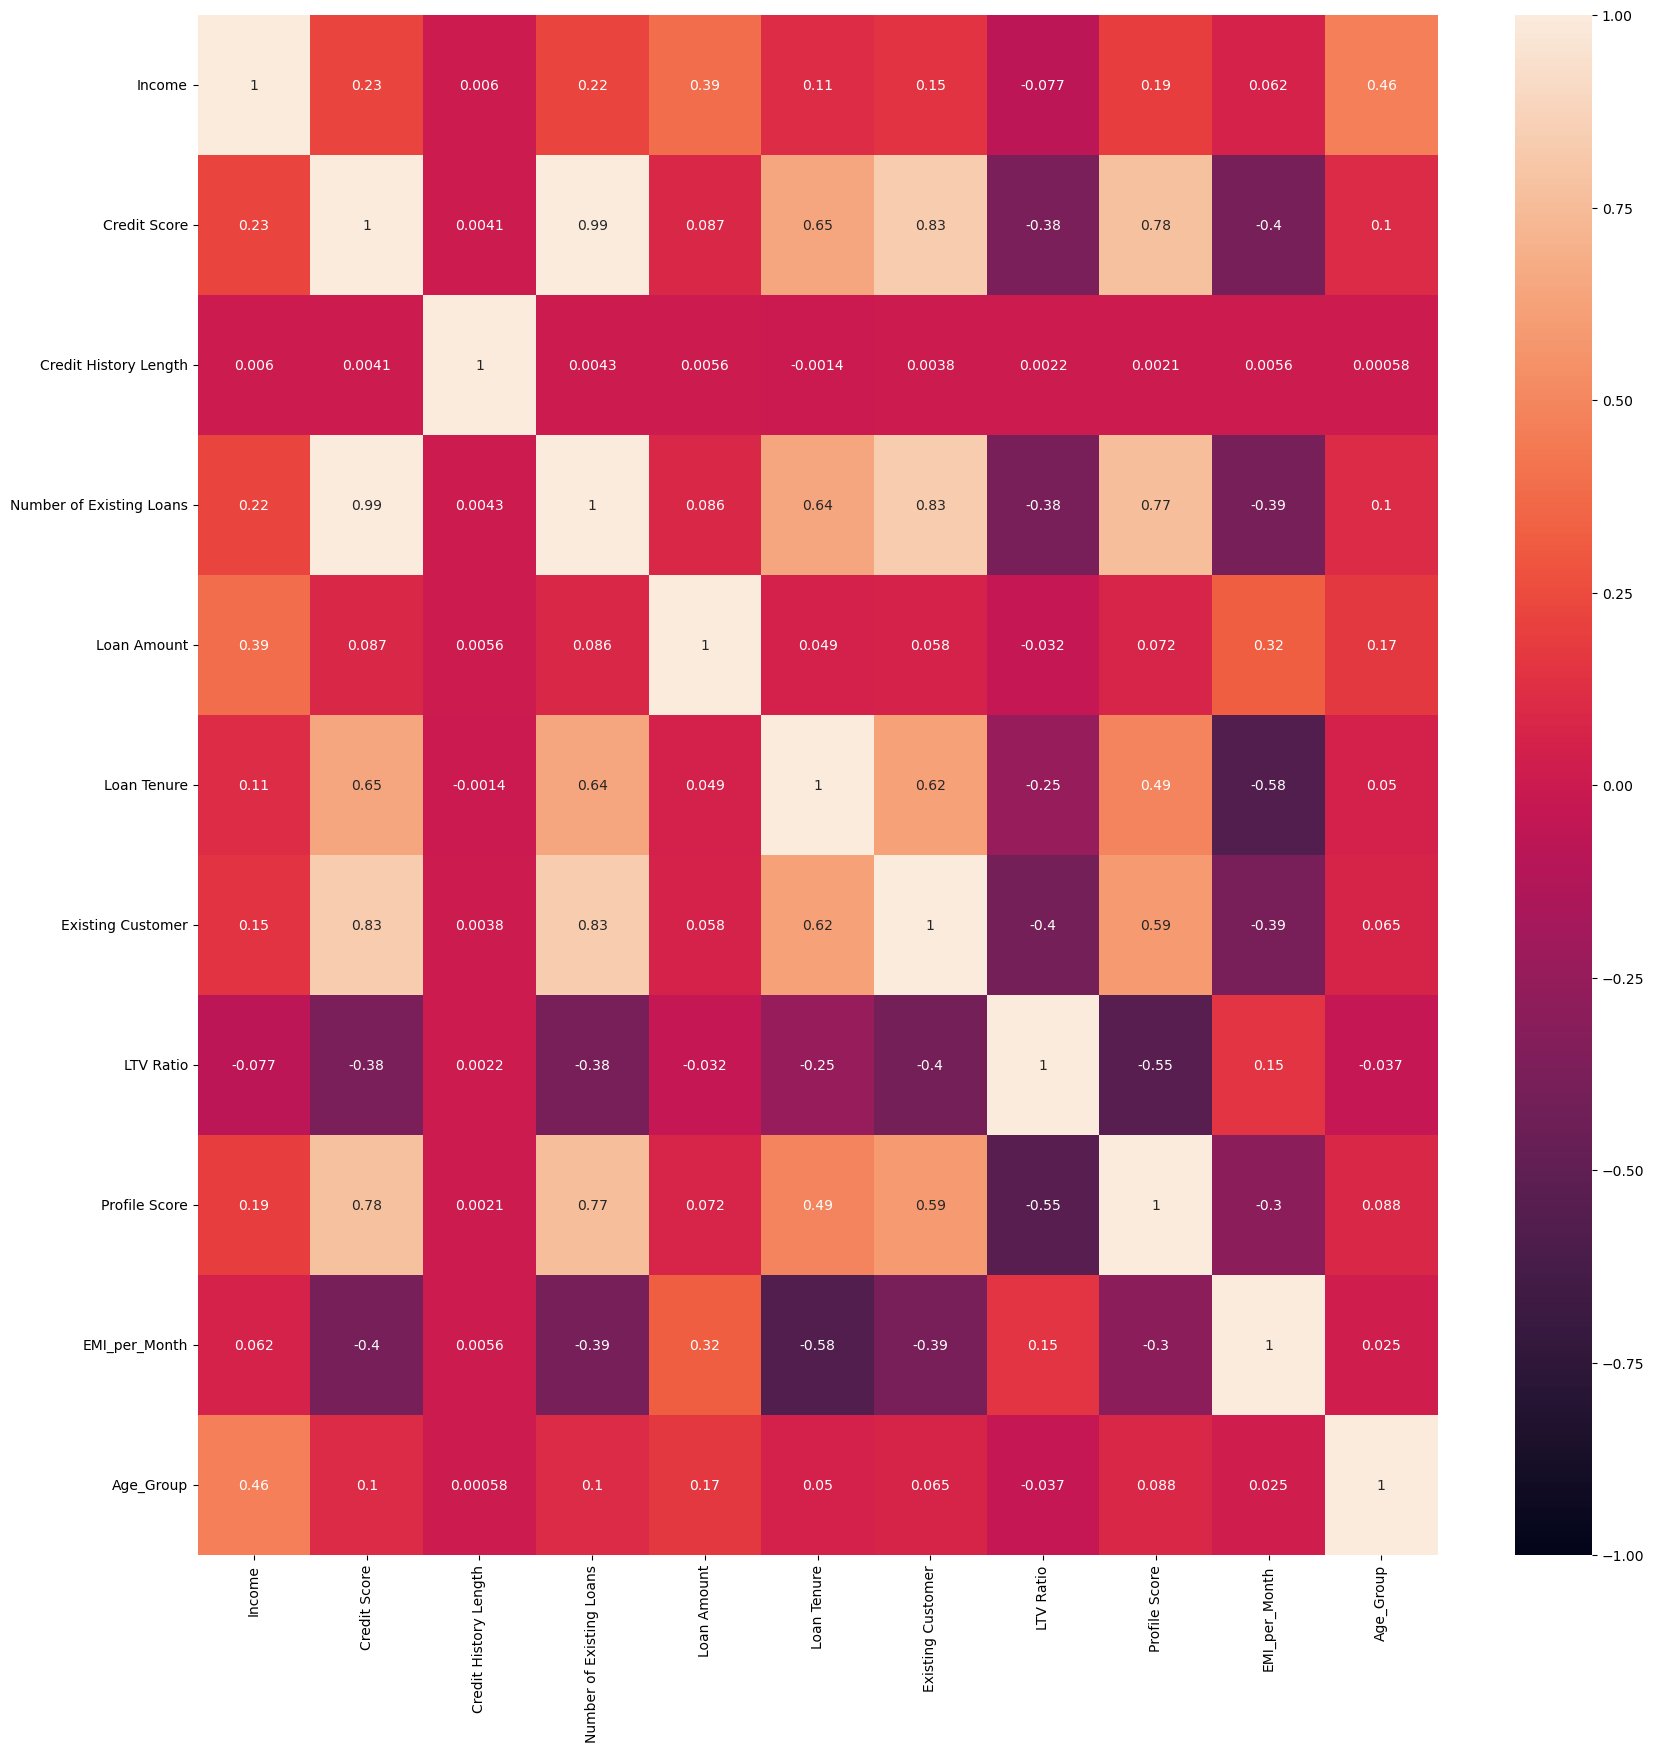

In [677]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1)

# Train Test Split

In [683]:
import statsmodels.api as sma
from sklearn.model_selection import train_test_split

In [684]:
x= df.drop(['Profile Score'],axis=1)
y= df['Profile Score']

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=1)

In [685]:
xtrain.head(2)

,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,City,LTV Ratio,Employment Profile,Occupation,EMI_per_Month,Age_Group
78689,52000,736,508,7,32141,150,1,Channarayapatna,64.06854,Unemployed,Others,214.273333,2
76423,41000,300,220,0,109580,114,0,Kanpur,95.00000,Salaried,Doctor,961.228070,2


In [686]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(80000, 13)
(80000,)
(20000, 13)
(20000,)


In [687]:
xtrain.select_dtypes(include="object").columns

Index(['City', 'Employment Profile', 'Occupation'], dtype='object')

In [688]:
import category_encoders as ce

In [689]:
xtrain['City']= xtrain['City'].astype('object')
xtrain['Employment Profile']= xtrain['Employment Profile'].astype('object')
xtrain['Occupation']= xtrain['Occupation'].astype('object')

In [690]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 78689 to 98539
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Income                    80000 non-null  int64  
 1   Credit Score              80000 non-null  int64  
 2   Credit History Length     80000 non-null  int64  
 3   Number of Existing Loans  80000 non-null  int64  
 4   Loan Amount               80000 non-null  int64  
 5   Loan Tenure               80000 non-null  int64  
 6   Existing Customer         80000 non-null  int64  
 7   City                      80000 non-null  object 
 8   LTV Ratio                 80000 non-null  float64
 9   Employment Profile        80000 non-null  object 
 10  Occupation                80000 non-null  object 
 11  EMI_per_Month             80000 non-null  float64
 12  Age_Group                 80000 non-null  int32  
dtypes: float64(2), int32(1), int64(7), object(3)
memory usage

In [691]:
# CatBoost Encoding:
for i in ['City', 'Employment Profile', 'Occupation']:
    cat_e= ce.CatBoostEncoder()
    cat_e.fit(xtrain[i],ytrain)
    xtrain[i]=cat_e.transform(xtrain[i])
    xtest[i]=cat_e.transform(xtest[i])

In [692]:
xtrain

,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,City,LTV Ratio,Employment Profile,Occupation,EMI_per_Month,Age_Group
78689,52000,736,508,7,32141,150,1,77.356243,64.068540,64.901303,64.901303,214.273333,2
76423,41000,300,220,0,109580,114,0,76.537866,95.000000,82.306353,82.271383,961.228070,2
86945,70000,766,428,8,50077,349,1,77.342524,52.395156,73.892195,74.854923,143.487106,0
57427,152000,787,357,8,84971,71,1,77.924706,44.401255,82.306353,82.391659,1196.774648,2
34616,162000,850,15,10,150000,206,1,77.459630,63.122641,64.901303,64.901303,728.155340,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,138000,711,261,7,150000,196,1,77.716363,64.598127,82.306353,82.391659,765.306122,1
98047,154000,850,608,10,150000,276,1,77.924706,44.873721,65.350263,65.350263,543.478261,2
5192,127000,503,60,3,150000,75,0,76.929184,89.219865,82.306353,82.164216,2000.000000,1
77708,75000,346,201,0,111561,56,0,77.485387,64.104418,73.892195,73.353451,1992.160714,1


In [693]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 78689 to 98539
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Income                    80000 non-null  int64  
 1   Credit Score              80000 non-null  int64  
 2   Credit History Length     80000 non-null  int64  
 3   Number of Existing Loans  80000 non-null  int64  
 4   Loan Amount               80000 non-null  int64  
 5   Loan Tenure               80000 non-null  int64  
 6   Existing Customer         80000 non-null  int64  
 7   City                      80000 non-null  float64
 8   LTV Ratio                 80000 non-null  float64
 9   Employment Profile        80000 non-null  float64
 10  Occupation                80000 non-null  float64
 11  EMI_per_Month             80000 non-null  float64
 12  Age_Group                 80000 non-null  int32  
dtypes: float64(5), int32(1), int64(7)
memory usage: 8.2 MB


# Scaling

In [694]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [695]:
nums.columns

Index(['Income', 'Credit Score', 'Credit History Length', 'Loan Amount',
       'Loan Tenure', 'LTV Ratio', 'EMI_per_Month'],
      dtype='object')

In [696]:
num_cols=['Income', 'Credit Score', 'Credit History Length', 'Loan Amount','Loan Tenure', 'LTV Ratio', 'EMI_per_Month']

for i in num_cols:
    xtrain.loc[:,i]= sc.fit_transform(pd.DataFrame(xtrain.loc[:,i]))
    
    xtest.loc[:,i]=sc.fit_transform(pd.DataFrame(xtest.loc[:,i]))

In [774]:
xtrain['City'].nunique()

23

In [697]:
xtrain.head()

,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,City,LTV Ratio,Employment Profile,Occupation,EMI_per_Month,Age_Group
78689,-0.572972,0.936262,1.143608,7,-1.815957,0.175518,1,77.356243,-0.454735,64.901303,64.901303,-0.758589,2
76423,-0.830052,-1.738769,-0.501336,0,0.096116,-0.200279,0,76.537866,1.380039,82.306353,82.271383,-0.314114,2
86945,-0.152297,1.120324,0.686679,8,-1.373093,2.252839,1,77.342524,-1.147170,73.892195,74.854923,-0.800711,0
57427,1.764115,1.249168,0.281155,8,-0.511513,-0.649147,1,77.924706,-1.621348,82.306353,82.391659,-0.173952,2
34616,1.997823,1.635697,-1.672217,10,1.094141,0.760091,1,77.459630,-0.510844,64.901303,64.901303,-0.452804,2


In [698]:
xtest.head()

,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,City,LTV Ratio,Employment Profile,Occupation,EMI_per_Month,Age_Group
43660,1.306810,-0.735499,1.378961,2,1.095365,-0.630448,0,77.459630,-0.531653,75.432330,74.988049,0.334561,1
87278,-1.027928,0.460779,1.259315,6,0.858631,1.351438,1,76.815278,1.287760,64.901303,64.901303,-0.566031,1
14317,-1.074623,-0.355144,-0.392938,4,-0.001900,-0.880791,0,77.485387,1.120492,82.306353,82.597349,0.390603,1
81932,0.583041,0.203119,-1.253249,5,-0.348760,1.476609,0,77.583395,-1.031583,82.306353,82.597349,-0.685661,1
95321,-1.144665,-1.410322,0.507255,0,-0.455768,-1.089410,0,76.815278,-0.295468,82.306353,82.391659,0.890979,1


# Base Model

In [699]:
XTRAIN= sma.add_constant(xtrain)
XTEST= sma.add_constant(xtest)

In [700]:
xtrain.dtypes

Income                      float64
Credit Score                float64
Credit History Length       float64
Number of Existing Loans      int64
Loan Amount                 float64
Loan Tenure                 float64
Existing Customer             int64
City                        float64
LTV Ratio                   float64
Employment Profile          float64
Occupation                  float64
EMI_per_Month               float64
Age_Group                     int32
dtype: object

In [701]:
model= sma.OLS(ytrain,XTRAIN).fit()

In [702]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Profile Score   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                 1.658e+04
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:04:21   Log-Likelihood:            -3.1722e+05
No. Observations:               80000   AIC:                         6.345e+05
Df Residuals:                   79986   BIC:                         6.346e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       19.9712      8.150      2.450      0.014       3.997      35.945
Income                      -0.4243      0.056     -7.558      0.000      -0.534      -0.314
Credit Score                37.3394      0.437     85.519      0.000      36.484      38.195
Credit History Length       -0.0009      0.045     -0.020      0.984      -0.089       0.088
Number of Existing Loans    -5.6124      0.145    -38.623      0.000      -5.897      -5.328
Loan Amount                  0.0098      0.054      0.182      0.855      -0.095       0.115
Loan Tenure                  0.5464      0.069      7.933      0.000       0.411       0.681
Existing Customer          -13.0106      0.174    -74.560      0.000     -13.353     -12.669
City                         0.4299      0.105      4.103      0.000       0.225       0.635
LTV Ratio                   -7.7765      0.050   -157.083      0.000      -7.874      -7.679
Employment Profile           0.4973      0.155      3.204      0.001       0.193       0.802
Occupation                   0.2200      0.155      1.419      0.156      -0.084       0.524
EMI_per_Month               -0.0027      0.061     -0.044      0.965      -0.123       0.117
Age_Group                    0.0137      0.063      0.217      0.828      -0.110       0.138
==============================================================================
Omnibus:                     2088.695   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1292.140
Skew:                          -0.172   Prob(JB):                    2.60e-281
Kurtosis:                       2.481   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Base Model: Inference

Applied OLS as a base model where R2 score is approximately 73% however the assumptions of the OLS model that is multicollinearity in the data exists which can be seen via Condition number mnetioned in the model summary.

Checking the rest of the assumptions of the linear model.

In [706]:
df.head()

,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,City,LTV Ratio,Employment Profile,Profile Score,Occupation,EMI_per_Month,Age_Group
0,32000,596,14,5,150000,39,0,Hyderabad,90.593752,Self-Employed,72,Business Owner,3846.153846,0
1,83000,477,446,3,93015,62,0,Thiruvananthapuram,65.457810,Self-Employed,65,Shopkeeper,1500.241935,1
2,107000,762,538,8,150000,114,1,New Delhi,59.584610,Salaried,90,Civil Servant,1315.789474,1
3,77000,412,422,2,150000,111,0,Kolkata,55.129330,Salaried,66,Teacher,1351.351351,2
4,119000,849,180,9,90438,133,1,Kolkata,54.397947,Self-Employed,100,Business Owner,679.984962,1


In [707]:
df.shape

(100000, 14)

In [708]:
num_cols=['Income','Credit Score','Credit History Length','Loan Amount','Loan Tenure','LTV Ratio']

### Lets check the assumptions for Linear Regression Model

Assumptions after fitting the model

* Multicollinearity- There should be no multicolinearity in the columns
* Linearity- Linearity in the dataset
* Autocorrelation of errors- Errord must not be correlated with each other
* Homoskedasticity- The spread of the variance must be consistent
* Normality- Error terms must follow N(0,1)

### Multicollinearity in the columns:

In [709]:
vif=[variance_inflation_factor(XTRAIN[num_cols].values,i) for i in range(XTRAIN[num_cols].shape[1])]

In [710]:
pd.DataFrame({"VIF":vif},index=XTRAIN[num_cols].columns).sort_values(by="VIF",ascending=False)

,VIF
Credit Score,1.962640
Loan Tenure,1.719876
Income,1.236654
Loan Amount,1.180125
LTV Ratio,1.171840
Credit History Length,1.000120


* There seems to be multicollinearity in Credit Score and Age column since it's VIF score is greater than 10.

### Linearity in the dataset:

In [711]:
pvalue=smsa.linear_rainbow(model)[1]

if pvalue < 0.05:
    print('Reject Ho: The model is not linear')
else:
    print('Fail to reject Ho: The model is linear')

Fail to reject Ho: The model is linear


### Autocorrelation of Errors:

* The durbin watson number in model summary is 2.004 ~ 2. hence we can say that there is no Autocorrelation in the dataset. 

### Homoskedasticity:

In [712]:
ypred_train=model.predict(XTRAIN)

<AxesSubplot:ylabel='Profile Score'>

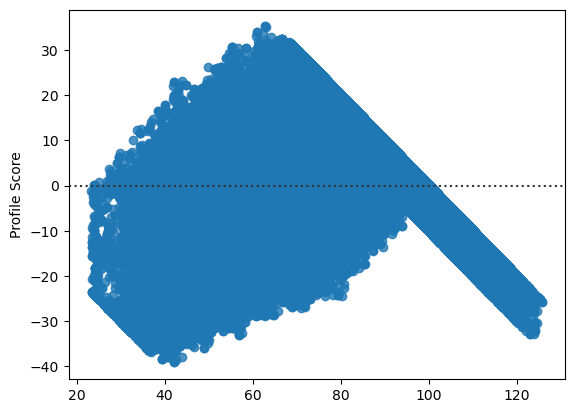

In [713]:
sns.residplot(x=ypred_train,y=ytrain)

* Since the residuals are increasing when when profile is increasing, hence there is a heteroskedasicity in the dataset. Or it fails to meet the homoskedascity assumption in Linear Model.

### Normality of Residuals

Skewness: -0.17206278982396325


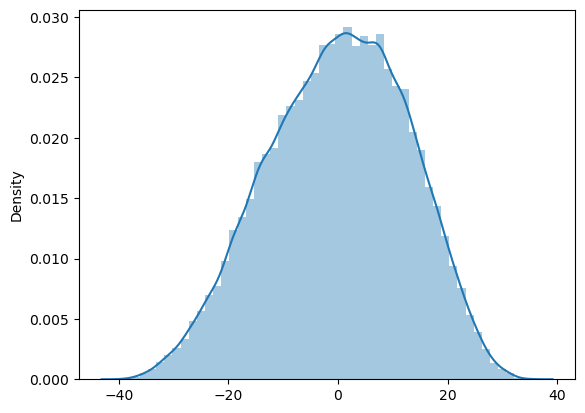

In [714]:
sns.distplot(model.resid)
print("Skewness:",model.resid.skew())

In [715]:
pvalue = stats.jarque_bera(model.resid)[1]
# Ho: The Resid is normal
# Ha: Resid is not normal
print("Pvalue:",pvalue)
if pvalue < 0.05:
    print('Reject Ho: Residuals is not normal')
else:
    print('Fail to reject Ho: Residual is normal')

Pvalue: 0.0
Reject Ho: Residuals is not normal


### Since there is a multicollinearity in the Credit Score and Age column. 

**Therefore, we are dropping both of these column and applying the model on the basis of the rest of the predictors to check if the model meets the assumptions**

In [481]:
X_wot_vif=XTRAIN.drop(["Credit Score","Age"],axis=1)

In [482]:
sma.OLS(ytrain,X_wot_vif).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Profile Score   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                 1.778e+04
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:42:05   Log-Likelihood:            -3.2269e+05
No. Observations:               80000   AIC:                         6.454e+05
Df Residuals:                   79989   BIC:                         6.455e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Income                      -0.1336      0.054     -2.465      0.014      -0.240      -0.027
Credit History Length       -0.0187      0.048     -0.386      0.699      -0.113       0.076
Number of Existing Loans     5.2365      0.023    230.668      0.000       5.192       5.281
Loan Amount                  0.0133      0.057      0.232      0.817      -0.099       0.126
Loan Tenure                  0.1249      0.073      1.722      0.085      -0.017       0.267
Existing Customer          -39.0446      8.694     -4.491      0.000     -56.084     -22.005
City                         0.4560      0.112      4.064      0.000       0.236       0.676
LTV Ratio                   -7.2399      0.052   -138.392      0.000      -7.342      -7.137
Employment Profile           0.5113      0.166      3.076      0.002       0.186       0.837
Occupation                   0.2188      0.166      1.318      0.188      -0.107       0.544
EMI_per_Month                0.0482      0.066      0.735      0.462      -0.080       0.177
==============================================================================
Omnibus:                     1868.547   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1533.196
Skew:                          -0.267   Prob(JB):                         0.00
Kurtosis:                       2.582   Cond. No.                     2.41e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Inference
* R2 score of the model dropped and the multicollinearity in the data still exists. So, the conclusion came out to be that Linear regression model is not working best on the dataset.

**Therefore, exploring others models for the better performance**

In [716]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

# Stochastic Gradient Descent

In [717]:
xtrain.head()

,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,City,LTV Ratio,Employment Profile,Occupation,EMI_per_Month,Age_Group
78689,-0.572972,0.936262,1.143608,7,-1.815957,0.175518,1,77.356243,-0.454735,64.901303,64.901303,-0.758589,2
76423,-0.830052,-1.738769,-0.501336,0,0.096116,-0.200279,0,76.537866,1.380039,82.306353,82.271383,-0.314114,2
86945,-0.152297,1.120324,0.686679,8,-1.373093,2.252839,1,77.342524,-1.147170,73.892195,74.854923,-0.800711,0
57427,1.764115,1.249168,0.281155,8,-0.511513,-0.649147,1,77.924706,-1.621348,82.306353,82.391659,-0.173952,2
34616,1.997823,1.635697,-1.672217,10,1.094141,0.760091,1,77.459630,-0.510844,64.901303,64.901303,-0.452804,2


In [718]:
param={"alpha":[0.2,0.3,0.4],
      "max_iter":[1000,2000,3000]}

In [719]:
gd=GridSearchCV(estimator=SGDRegressor(),param_grid=param,cv=5,scoring='r2')
gd.fit(xtrain,ytrain)
gd.best_params_

{'alpha': 0.2, 'max_iter': 1000}

In [720]:
sgd=SGDRegressor(alpha=0.2,max_iter=3000)
model_sgd=sgd.fit(xtrain_scaled,ytrain)
ytrain_pred=model_sgd.predict(xtrain_scaled)
y_pred=model_sgd.predict(xtest_scaled)

print("Stochastic gradient descent:")
print("Training R2 Score:",r2_score(ytrain,ytrain_pred))
print("Training RMSE:",np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
print("Testing R2 Score:",r2_score(ytest,y_pred))
print("Testing RMSE:",np.sqrt(mean_squared_error(ytest,y_pred)))

Stochastic gradient descent:
Training R2 Score: 0.6886718200302075
Training RMSE: 13.68618209304591
Testing R2 Score: 0.6882930374313614
Testing RMSE: 13.633133299151508


### The application of stochastic gradient descent (SGD) on the dataset has declined the performance when compared with Base Model.

**Will switch to other models for the better performance**



# K Neighbor Regressor

In [781]:
from sklearn.neighbors import KNeighborsRegressor

In [783]:
kn=KNeighborsRegressor()

In [789]:
params= {'n_neighbors':[5,7,9,11,13],'p':[1,2,4]}
gd= GridSearchCV(estimator=kn, param_grid=params,scoring='r2',cv=5)

In [790]:
gd.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(n_neighbors=8, p=1),
             param_grid={'n_neighbors': [5, 7, 9, 11, 13], 'p': [1, 2, 4]},
             scoring='r2')

In [791]:
gd.best_params_

{'n_neighbors': 13, 'p': 2}

In [794]:
kn= KNeighborsRegressor(**gd.best_params_)
model_kn=kn.fit(xtrain,ytrain)

ytrain_pred=model_kn.predict(xtrain)
y_pred=model_kn.predict(xtest)

print("KNN:")
print("Training R2 Score:",r2_score(ytrain,ytrain_pred))
print("Training RMSE:",np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
print("Testing R2 Score:",r2_score(ytest,y_pred))
print("Testing RMSE:",np.sqrt(mean_squared_error(ytest,y_pred)))

KNN:
Training R2 Score: 0.8753494190625926
Training RMSE: 8.660047039071722
Testing R2 Score: 0.851935313385694
Testing RMSE: 9.396111794987613


* K Nearest Neighbor is giving us the generalized performance with good R sq and low RMSE. It seems that the model is performing well both in training and testing phase

**Still we'll try to switch to the other models if they can provide us the better working than this model**

# Decision Tree

In [276]:
df.shape

(100000, 16)

In [724]:
param={"max_depth":[2,3,4,5,6,7,8,9],"max_features":[2,4,6,8,10,12,14,16]}

In [725]:
gd=GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=param,scoring='r2',cv=5)

In [726]:
gd.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [2, 4, 6, 8, 10, 12, 14, 16]},
             scoring='r2')

In [727]:
gd.best_params_

{'max_depth': 9, 'max_features': 12}

In [730]:
xtrain

,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,City,LTV Ratio,Employment Profile,Occupation,EMI_per_Month,Age_Group
78689,-0.572972,0.936262,1.143608,7,-1.815957,0.175518,1,77.356243,-0.454735,64.901303,64.901303,-0.758589,2
76423,-0.830052,-1.738769,-0.501336,0,0.096116,-0.200279,0,76.537866,1.380039,82.306353,82.271383,-0.314114,2
86945,-0.152297,1.120324,0.686679,8,-1.373093,2.252839,1,77.342524,-1.147170,73.892195,74.854923,-0.800711,0
57427,1.764115,1.249168,0.281155,8,-0.511513,-0.649147,1,77.924706,-1.621348,82.306353,82.391659,-0.173952,2
34616,1.997823,1.635697,-1.672217,10,1.094141,0.760091,1,77.459630,-0.510844,64.901303,64.901303,-0.452804,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,1.436923,0.782878,-0.267160,7,1.094141,0.655703,1,77.716363,-0.423322,82.306353,82.391659,-0.430697,1
98047,1.810857,1.635697,1.714769,10,1.094141,1.490807,1,77.924706,-1.593322,65.350263,65.350263,-0.562696,2
5192,1.179843,-0.493284,-1.415194,3,1.094141,-0.607392,0,76.929184,1.037176,82.306353,82.164216,0.304008,1
77708,-0.035442,-1.456541,-0.609857,0,0.145030,-0.805729,0,77.485387,-0.452607,73.892195,73.353451,0.299343,1


In [731]:
dt= DecisionTreeRegressor(max_depth=9,max_features=12,random_state=1)
model_dt=dt.fit(xtrain,ytrain)

ytrain_pred=model_dt.predict(xtrain)
y_pred=model_dt.predict(xtest)

print("Decision Tree Regressor:")
print("Training R2 Score:",r2_score(ytrain,ytrain_pred))
print("Training RMSE:",np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
print("Testing R2 Score:",r2_score(ytest,y_pred))
print("Testing RMSE:",np.sqrt(mean_squared_error(ytest,y_pred)))

Decision Tree Regressor:
Training R2 Score: 0.8810623034031269
Training RMSE: 8.459269463590736
Testing R2 Score: 0.8639868141768774
Testing RMSE: 9.005605868285826


In [733]:
dt.feature_importances_

array([7.70282319e-04, 6.60694741e-01, 1.31208510e-03, 4.89932436e-02,
       8.79716096e-04, 9.87416552e-04, 0.00000000e+00, 5.27982868e-04,
       2.33337411e-01, 2.68654381e-02, 2.46676799e-02, 9.00461502e-04,
       6.35418926e-05])

<AxesSubplot:>

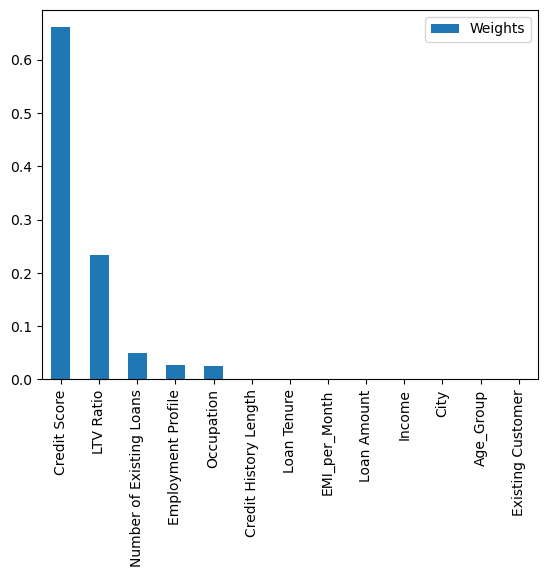

In [734]:
pd.DataFrame(dt.feature_importances_,
            index=xtrain.columns , columns = ['Weights']).\
sort_values(by = 'Weights' , ascending = False).plot(kind = 'bar')

### The Decision Tree Regressor appears to be a strong model for the given problem statement

* The high training and testing R² scores (0.8816 and 0.8659, respectively) indicate that the Decision Tree Regressor is capturing a substantial portion of the variance in both the training and testing datasets.

* The relatively low RMSE values (8.4407 for training and 8.9416 for testing) suggest that the model's predictions are, on average, quite close to the actual values in both datasets.

# XGBoost Regressor

In [754]:
from xgboost import XGBRegressor

In [755]:
xgb= XGBRegressor()

In [758]:
params = {'max_depth':[7,8,9], 'gamma':[1,0.8,0.5],'lambda':[2.1,2.2,2.4],\
          'max_leaves':[0],'eta':[0.3,0.2,0.1],'min_child_weight':[1.7,1.5,1.8]}
gdcv = GridSearchCV(estimator=xgb, scoring='neg_root_mean_squared_error',cv=5\
                       param_grid= params)

In [759]:
gdcv.fit(xtrain,ytrain)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END eta=0.3, gamma=1, lambda=2.1, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.408 total time=   0.8s
[CV 2/5] END eta=0.3, gamma=1, lambda=2.1, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.300 total time=   0.6s
[CV 3/5] END eta=0.3, gamma=1, lambda=2.1, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.348 total time=   0.6s
[CV 4/5] END eta=0.3, gamma=1, lambda=2.1, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.401 total time=   0.6s
[CV 5/5] END eta=0.3, gamma=1, lambda=2.1, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.336 total time=   0.6s
[CV 1/5] END eta=0.3, gamma=1, lambda=2.1, max_depth=7, max_leaves=0, min_child_weight=1.5;, score=-8.408 total time=   0.6s
[CV 2/5] END eta=0.3, gamma=1, lambda=2.1, max_depth=7, max_leaves=0, min_child_weight=1.5;, score=-8.300 total time=   0.6s
[CV 3/5] END eta=0.3, gamma=1, lambda=2.1, max_depth=7, max_l

[CV 2/5] END eta=0.3, gamma=1, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.161 total time=   0.9s
[CV 3/5] END eta=0.3, gamma=1, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.164 total time=   0.9s
[CV 4/5] END eta=0.3, gamma=1, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.203 total time=   0.9s
[CV 5/5] END eta=0.3, gamma=1, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.149 total time=   1.0s
[CV 1/5] END eta=0.3, gamma=1, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.8;, score=-8.220 total time=   0.9s
[CV 2/5] END eta=0.3, gamma=1, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.8;, score=-8.161 total time=   0.9s
[CV 3/5] END eta=0.3, gamma=1, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.8;, score=-8.164 total time=   0.9s
[CV 4/5] END eta=0.3, gamma=1, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.8;, score=-8.203 total time=   0.9s


[CV 3/5] END eta=0.3, gamma=1, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-7.988 total time=   1.3s
[CV 4/5] END eta=0.3, gamma=1, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-7.993 total time=   1.4s
[CV 5/5] END eta=0.3, gamma=1, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-7.905 total time=   1.4s
[CV 1/5] END eta=0.3, gamma=0.8, lambda=2.1, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.404 total time=   0.6s
[CV 2/5] END eta=0.3, gamma=0.8, lambda=2.1, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.332 total time=   0.7s
[CV 3/5] END eta=0.3, gamma=0.8, lambda=2.1, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.369 total time=   0.7s
[CV 4/5] END eta=0.3, gamma=0.8, lambda=2.1, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.401 total time=   0.7s
[CV 5/5] END eta=0.3, gamma=0.8, lambda=2.1, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.320 total tim

[CV 3/5] END eta=0.3, gamma=0.8, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.166 total time=   1.1s
[CV 4/5] END eta=0.3, gamma=0.8, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.180 total time=   1.3s
[CV 5/5] END eta=0.3, gamma=0.8, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.119 total time=   1.2s
[CV 1/5] END eta=0.3, gamma=0.8, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.211 total time=   1.1s
[CV 2/5] END eta=0.3, gamma=0.8, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.159 total time=   0.9s
[CV 3/5] END eta=0.3, gamma=0.8, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.166 total time=   0.9s
[CV 4/5] END eta=0.3, gamma=0.8, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.180 total time=   0.9s
[CV 5/5] END eta=0.3, gamma=0.8, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.119 tot

[CV 3/5] END eta=0.3, gamma=0.8, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-8.007 total time=   1.5s
[CV 4/5] END eta=0.3, gamma=0.8, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-8.002 total time=   1.5s
[CV 5/5] END eta=0.3, gamma=0.8, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-7.947 total time=   1.7s
[CV 1/5] END eta=0.3, gamma=0.8, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-7.995 total time=   1.6s
[CV 2/5] END eta=0.3, gamma=0.8, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-7.950 total time=   1.7s
[CV 3/5] END eta=0.3, gamma=0.8, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-8.007 total time=   1.4s
[CV 4/5] END eta=0.3, gamma=0.8, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-8.002 total time=   1.4s
[CV 5/5] END eta=0.3, gamma=0.8, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-7.947 tot

[CV 3/5] END eta=0.3, gamma=0.5, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.396 total time=   0.8s
[CV 4/5] END eta=0.3, gamma=0.5, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.384 total time=   0.8s
[CV 5/5] END eta=0.3, gamma=0.5, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.378 total time=   0.7s
[CV 1/5] END eta=0.3, gamma=0.5, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.178 total time=   1.2s
[CV 2/5] END eta=0.3, gamma=0.5, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.166 total time=   1.2s
[CV 3/5] END eta=0.3, gamma=0.5, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.168 total time=   1.1s
[CV 4/5] END eta=0.3, gamma=0.5, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.192 total time=   0.9s
[CV 5/5] END eta=0.3, gamma=0.5, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.150 tot

[CV 3/5] END eta=0.3, gamma=0.5, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.7;, score=-7.953 total time=   1.5s
[CV 4/5] END eta=0.3, gamma=0.5, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.7;, score=-8.040 total time=   1.5s
[CV 5/5] END eta=0.3, gamma=0.5, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.7;, score=-7.930 total time=   1.6s
[CV 1/5] END eta=0.3, gamma=0.5, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-7.983 total time=   1.4s
[CV 2/5] END eta=0.3, gamma=0.5, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-7.948 total time=   1.3s
[CV 3/5] END eta=0.3, gamma=0.5, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-7.953 total time=   1.4s
[CV 4/5] END eta=0.3, gamma=0.5, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-8.040 total time=   1.4s
[CV 5/5] END eta=0.3, gamma=0.5, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-7.930 tot

[CV 4/5] END eta=0.2, gamma=1, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.5;, score=-8.428 total time=   0.6s
[CV 5/5] END eta=0.2, gamma=1, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.5;, score=-8.369 total time=   0.7s
[CV 1/5] END eta=0.2, gamma=1, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.454 total time=   0.7s
[CV 2/5] END eta=0.2, gamma=1, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.409 total time=   0.7s
[CV 3/5] END eta=0.2, gamma=1, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.427 total time=   0.7s
[CV 4/5] END eta=0.2, gamma=1, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.428 total time=   0.7s
[CV 5/5] END eta=0.2, gamma=1, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.369 total time=   0.7s
[CV 1/5] END eta=0.2, gamma=1, lambda=2.2, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.258 total time=   0.9s


[CV 5/5] END eta=0.2, gamma=1, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.8;, score=-8.189 total time=   1.2s
[CV 1/5] END eta=0.2, gamma=1, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.7;, score=-8.067 total time=   1.7s
[CV 2/5] END eta=0.2, gamma=1, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.7;, score=-8.002 total time=   1.5s
[CV 3/5] END eta=0.2, gamma=1, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.7;, score=-8.006 total time=   1.7s
[CV 4/5] END eta=0.2, gamma=1, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.7;, score=-8.053 total time=   1.6s
[CV 5/5] END eta=0.2, gamma=1, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.7;, score=-7.956 total time=   1.6s
[CV 1/5] END eta=0.2, gamma=1, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-8.067 total time=   1.7s
[CV 2/5] END eta=0.2, gamma=1, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-8.002 total time=   1.6s


[CV 5/5] END eta=0.2, gamma=0.8, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.369 total time=   0.8s
[CV 1/5] END eta=0.2, gamma=0.8, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.5;, score=-8.454 total time=   0.8s
[CV 2/5] END eta=0.2, gamma=0.8, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.5;, score=-8.409 total time=   0.7s
[CV 3/5] END eta=0.2, gamma=0.8, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.5;, score=-8.420 total time=   0.7s
[CV 4/5] END eta=0.2, gamma=0.8, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.5;, score=-8.428 total time=   0.8s
[CV 5/5] END eta=0.2, gamma=0.8, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.5;, score=-8.369 total time=   0.7s
[CV 1/5] END eta=0.2, gamma=0.8, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.454 total time=   0.8s
[CV 2/5] END eta=0.2, gamma=0.8, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.409 tot

[CV 5/5] END eta=0.2, gamma=0.8, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.180 total time=   0.9s
[CV 1/5] END eta=0.2, gamma=0.8, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.8;, score=-8.268 total time=   1.1s
[CV 2/5] END eta=0.2, gamma=0.8, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.8;, score=-8.255 total time=   1.0s
[CV 3/5] END eta=0.2, gamma=0.8, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.8;, score=-8.207 total time=   1.1s
[CV 4/5] END eta=0.2, gamma=0.8, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.8;, score=-8.243 total time=   1.1s
[CV 5/5] END eta=0.2, gamma=0.8, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.8;, score=-8.180 total time=   1.1s
[CV 1/5] END eta=0.2, gamma=0.8, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.7;, score=-8.079 total time=   2.0s
[CV 2/5] END eta=0.2, gamma=0.8, lambda=2.4, max_depth=9, max_leaves=0, min_child_weight=1.7;, score=-8.014 tot

[CV 5/5] END eta=0.2, gamma=0.5, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-7.969 total time=   1.4s
[CV 1/5] END eta=0.2, gamma=0.5, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.460 total time=   0.7s
[CV 2/5] END eta=0.2, gamma=0.5, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.410 total time=   0.7s
[CV 3/5] END eta=0.2, gamma=0.5, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.423 total time=   0.7s
[CV 4/5] END eta=0.2, gamma=0.5, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.433 total time=   0.7s
[CV 5/5] END eta=0.2, gamma=0.5, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.371 total time=   0.7s
[CV 1/5] END eta=0.2, gamma=0.5, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.5;, score=-8.460 total time=   0.7s
[CV 2/5] END eta=0.2, gamma=0.5, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.5;, score=-8.410 tot

[CV 5/5] END eta=0.2, gamma=0.5, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.185 total time=   1.0s
[CV 1/5] END eta=0.2, gamma=0.5, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.254 total time=   0.9s
[CV 2/5] END eta=0.2, gamma=0.5, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.215 total time=   1.0s
[CV 3/5] END eta=0.2, gamma=0.5, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.206 total time=   0.9s
[CV 4/5] END eta=0.2, gamma=0.5, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.242 total time=   1.0s
[CV 5/5] END eta=0.2, gamma=0.5, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.185 total time=   1.0s
[CV 1/5] END eta=0.2, gamma=0.5, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.8;, score=-8.254 total time=   1.0s
[CV 2/5] END eta=0.2, gamma=0.5, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.8;, score=-8.215 tot

[CV 1/5] END eta=0.1, gamma=1, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-8.233 total time=   1.5s
[CV 2/5] END eta=0.1, gamma=1, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-8.162 total time=   1.6s
[CV 3/5] END eta=0.1, gamma=1, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-8.172 total time=   1.5s
[CV 4/5] END eta=0.1, gamma=1, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-8.189 total time=   1.5s
[CV 5/5] END eta=0.1, gamma=1, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-8.139 total time=   1.5s
[CV 1/5] END eta=0.1, gamma=1, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.570 total time=   0.7s
[CV 2/5] END eta=0.1, gamma=1, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.545 total time=   0.7s
[CV 3/5] END eta=0.1, gamma=1, lambda=2.2, max_depth=7, max_leaves=0, min_child_weight=1.7;, score=-8.557 total time=   0.7s


[CV 2/5] END eta=0.1, gamma=1, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.384 total time=   1.0s
[CV 3/5] END eta=0.1, gamma=1, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.390 total time=   1.0s
[CV 4/5] END eta=0.1, gamma=1, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.380 total time=   1.0s
[CV 5/5] END eta=0.1, gamma=1, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.367 total time=   1.0s
[CV 1/5] END eta=0.1, gamma=1, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.422 total time=   1.0s
[CV 2/5] END eta=0.1, gamma=1, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.384 total time=   1.0s
[CV 3/5] END eta=0.1, gamma=1, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.390 total time=   0.9s
[CV 4/5] END eta=0.1, gamma=1, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.5;, score=-8.380 total time=   1.0s


[CV 2/5] END eta=0.1, gamma=0.8, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-8.179 total time=   1.4s
[CV 3/5] END eta=0.1, gamma=0.8, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-8.160 total time=   1.5s
[CV 4/5] END eta=0.1, gamma=0.8, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-8.202 total time=   1.5s
[CV 5/5] END eta=0.1, gamma=0.8, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-8.133 total time=   1.5s
[CV 1/5] END eta=0.1, gamma=0.8, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-8.223 total time=   1.5s
[CV 2/5] END eta=0.1, gamma=0.8, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-8.179 total time=   1.5s
[CV 3/5] END eta=0.1, gamma=0.8, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-8.160 total time=   1.5s
[CV 4/5] END eta=0.1, gamma=0.8, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.8;, score=-8.202 tot

[CV 2/5] END eta=0.1, gamma=0.8, lambda=2.4, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.542 total time=   0.6s
[CV 3/5] END eta=0.1, gamma=0.8, lambda=2.4, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.549 total time=   0.7s
[CV 4/5] END eta=0.1, gamma=0.8, lambda=2.4, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.526 total time=   0.7s
[CV 5/5] END eta=0.1, gamma=0.8, lambda=2.4, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.514 total time=   0.7s
[CV 1/5] END eta=0.1, gamma=0.8, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.409 total time=   1.0s
[CV 2/5] END eta=0.1, gamma=0.8, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.379 total time=   1.0s
[CV 3/5] END eta=0.1, gamma=0.8, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.388 total time=   1.0s
[CV 4/5] END eta=0.1, gamma=0.8, lambda=2.4, max_depth=8, max_leaves=0, min_child_weight=1.7;, score=-8.387 tot

[CV 2/5] END eta=0.1, gamma=0.5, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.7;, score=-8.168 total time=   1.4s
[CV 3/5] END eta=0.1, gamma=0.5, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.7;, score=-8.172 total time=   1.5s
[CV 4/5] END eta=0.1, gamma=0.5, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.7;, score=-8.208 total time=   1.6s
[CV 5/5] END eta=0.1, gamma=0.5, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.7;, score=-8.147 total time=   1.6s
[CV 1/5] END eta=0.1, gamma=0.5, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-8.200 total time=   1.5s
[CV 2/5] END eta=0.1, gamma=0.5, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-8.168 total time=   1.8s
[CV 3/5] END eta=0.1, gamma=0.5, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-8.172 total time=   1.9s
[CV 4/5] END eta=0.1, gamma=0.5, lambda=2.1, max_depth=9, max_leaves=0, min_child_weight=1.5;, score=-8.208 tot

[CV 2/5] END eta=0.1, gamma=0.5, lambda=2.4, max_depth=7, max_leaves=0, min_child_weight=1.5;, score=-8.543 total time=   0.7s
[CV 3/5] END eta=0.1, gamma=0.5, lambda=2.4, max_depth=7, max_leaves=0, min_child_weight=1.5;, score=-8.549 total time=   0.7s
[CV 4/5] END eta=0.1, gamma=0.5, lambda=2.4, max_depth=7, max_leaves=0, min_child_weight=1.5;, score=-8.533 total time=   0.6s
[CV 5/5] END eta=0.1, gamma=0.5, lambda=2.4, max_depth=7, max_leaves=0, min_child_weight=1.5;, score=-8.518 total time=   0.7s
[CV 1/5] END eta=0.1, gamma=0.5, lambda=2.4, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.577 total time=   0.7s
[CV 2/5] END eta=0.1, gamma=0.5, lambda=2.4, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.543 total time=   0.7s
[CV 3/5] END eta=0.1, gamma=0.5, lambda=2.4, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.549 total time=   0.7s
[CV 4/5] END eta=0.1, gamma=0.5, lambda=2.4, max_depth=7, max_leaves=0, min_child_weight=1.8;, score=-8.533 tot

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
        

In [760]:
gdcv.best_params_

{'eta': 0.3,
 'gamma': 0.5,
 'lambda': 2.1,
 'max_depth': 9,
 'max_leaves': 0,
 'min_child_weight': 1.7}

In [763]:
xgb = XGBRegressor(**gdcv.best_params_)
model_xgb=xgb.fit(xtrain,ytrain)

ytrain_pred=model_xgb.predict(xtrain)
y_pred=model_xgb.predict(xtest)

print("XGBoost Regressor:")
print("Training R2 Score:",r2_score(ytrain,ytrain_pred))
print("Training RMSE:",np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
print("Testing R2 Score:",r2_score(ytest,y_pred))
print("Testing RMSE:",np.sqrt(mean_squared_error(ytest,y_pred)))

XGBoost Regressor:
Training R2 Score: 0.9637593412561433
Training RMSE: 4.669508165262192
Testing R2 Score: 0.8916148299078823
Testing RMSE: 8.039098709226815


<AxesSubplot:>

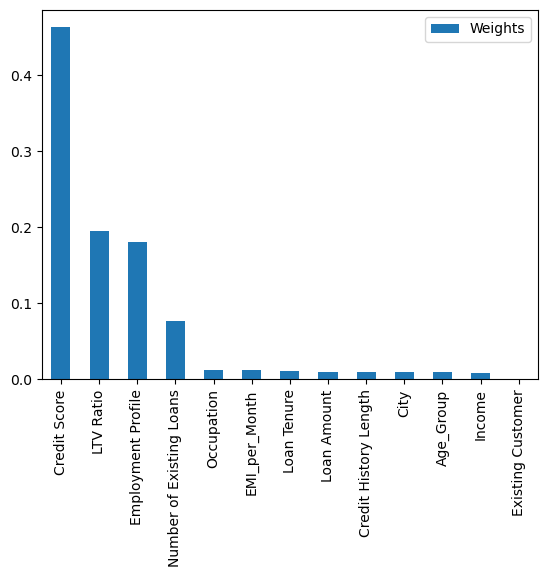

In [764]:
pd.DataFrame(xgb.feature_importances_,
            index=xtrain.columns , columns = ['Weights']).\
sort_values(by = 'Weights' , ascending = False).plot(kind = 'bar')

* Top 4 significant features- Credit Score, LTV Ratio, Employment Profile, Number of Existing Loans

# Conclusion-


**Model Performance:** The XGBoost Regressor demonstrates strong performance, as indicated by high R2 scores for both training (96.4%) and testing (89.2%) datasets. This suggests that the model captures a large proportion of the variance in the target variable.

**Overfitting:** There is a slight drop in performance from training to testing data, which is expected but not significant. The model's ability to generalize to unseen data is relatively good, indicating limited overfitting.

**Error Analysis:** The root mean squared error (RMSE) for both training (4.670) and testing (8.039) datasets is relatively low, suggesting that the model's predictions are, on average, close to the actual values.

**Model Utility:** Overall, the XGBoost Regressor appears to be a robust model for the given task, with strong predictive power and generalization capabilities. It can be considered reliable for making predictions on new data within a similar context.